# Title: Demand Prediction

#### Aim: To forecast future demand based on historical sales data, seasonal fluctuations, and market trends. 

Here In this project I have Utilized machine learning algorithms, statistical analysis, and time series analysis to create accurate predictions. This information will help manage inventory levels, prevent stock outs or overstocking, and optimize production planning.

### About Dataset

The auto industry in India is crucial to the development of the industrial sector, exports, and jobs in the nation. The performance and trends of this industry can be better understood by analyzing time-series data. We can find patterns and linkages between macroeconomic variables and the time-series data for the auto industry. For instance, if GDP growth and auto sales have a positive link, we can assume that a robust economy will result in more demand for automobiles. In a similar vein, if there is a negative link between inflation and the profitability of the auto sector, we may assume that higher inflation will raise production costs and lower industry profitability. We can foresee future trends and more precisely project the car industry's potential for growth by comprehending the connections between macroeconomic factors and the sector.

Auto sector time-series analysis using macro variables involves studying historical data and macroeconomic factors to gain insights into trends and patterns in the auto industry. This information can be used by businesses to adjust their strategies, make informed predictions about future demand, and evaluate their market position. Policymakers can use this data to assess the impact of policies on the industry and make informed decisions about how to support or regulate it.

### Columns details:
ID: A unique identifier for each record in the dataset.

Product: The name or model number of the product being sold.

Sales: The number of units sold for each product.

Make: The manufacturer of the product.

Type: The type of vehicle being sold (e.g. sedan, SUV, truck).

Dates: The date on which the sales occurred.

# 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,BaggingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import tensorflow
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from statsmodels.tsa.stattools import adfuller, acf,pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# 2. Loading Dataset

In [2]:
df=pd.read_csv(r"C:\Users\adite\Downloads\auto car sale.csv")
df.head(30)

_id  Prod.  sales          Make            Type                dates
0     1    554    418   Honda Civic  PASSENGER CARS  2007-07-31T00:00:00
1     2    533    630   Honda Civic  PASSENGER CARS  2007-08-31T00:00:00
2     3    405    305   Honda Civic  PASSENGER CARS  2007-09-30T00:00:00
3     4    662    581   Honda Civic  PASSENGER CARS  2007-10-31T00:00:00
4     5    423    348   Honda Civic  PASSENGER CARS  2007-11-30T00:00:00
5     6    363    315   Honda Civic  PASSENGER CARS  2007-12-31T00:00:00
6     7    477    521   Honda Civic  PASSENGER CARS  2008-01-31T00:00:00
7     8    598    579   Honda Civic  PASSENGER CARS  2008-02-29T00:00:00
8     9    332    449   Honda Civic  PASSENGER CARS  2008-03-31T00:00:00
9    10    419    527   Honda Civic  PASSENGER CARS  2008-04-30T00:00:00
10   11    418    417   Honda Civic  PASSENGER CARS  2008-05-31T00:00:00
11   12    629    672   Honda Civic  PASSENGER CARS  2008-06-30T00:00:00
12   13   1046    611    Honda City  PASSENGER CARS  2007-07-31T00:00:00
13   14    960   1506    Honda City  PASSENGER CARS  2007-08-31T00:00:00
14   15   1035    497    Honda City  PASSENGER CARS  2007-09-30T00:00:00
15   16    778    621    Honda City  PASSENGER CARS  2007-10-31T00:00:00
16   17    657    605    Honda City  PASSENGER CARS  2007-11-30T00:00:00
17   18    297    328    Honda City  PASSENGER CARS  2007-12-31T00:00:00
18   19    423    852    Honda City  PASSENGER CARS  2008-01-31T00:00:00
19   20    572    641    Honda City  PASSENGER CARS  2008-02-29T00:00:00
20   21    438    694    Honda City  PASSENGER CARS  2008-03-31T00:00:00
21   22    361    484    Honda City  PASSENGER CARS  2008-04-30T00:00:00
22   23    782    658    Honda City  PASSENGER CARS  2008-05-31T00:00:00
23   24    871    942    Honda City  PASSENGER CARS  2008-06-30T00:00:00
24   25    353    318  Suzuki Liana  PASSENGER CARS  2007-07-31T00:00:00
25   26    199    613  Suzuki Liana  PASSENGER CARS  2007-08-31T00:00:00
26   27    514    386  Suzuki Liana  PASSENGER CARS  2007-09-30T00:00:00
27   28    439    162  Suzuki Liana  PASSENGER CARS  2007-10-31T00:00:00
28   29    306    192  Suzuki Liana  PASSENGER CARS  2007-11-30T00:00:00
29   30     10    175  Suzuki Liana  PASSENGER CARS  2007-12-31T00:00:00

# 3. Data Understanding

In [3]:
# By using Info() function we can understand about the datatypes and shape of the columns in dataframe.
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   _id     5760 non-null   int64 
 1   Prod.   5760 non-null   int64 
 2   sales   5760 non-null   int64 
 3   Make    5760 non-null   object
 4   Type    5760 non-null   object
 5   dates   5760 non-null   object
dtypes: int64(3), object(3)
memory usage: 270.1+ KB


* here in above cell, we can say that the datatype of dates column is object. So we have to change it into datetime. also we have to change the columns name as per our convenience.

In [4]:
# describe() function tells us about the maximum minimum and stats tools about data.
df.describe(include="all")

_id          Prod.          sales  Make  \
count   5760.000000    5760.000000    5760.000000  5760   
unique          NaN            NaN            NaN    62   
top             NaN            NaN            NaN  Ravi   
freq            NaN            NaN            NaN   144   
mean    2880.500000    2683.564931    2681.805208   NaN   
std     1662.913107   10045.368338   10043.435990   NaN   
min        1.000000       0.000000       0.000000   NaN   
25%     1440.750000      18.000000      21.000000   NaN   
50%     2880.500000     355.000000     341.000000   NaN   
75%     4320.250000    1620.000000    1602.500000   NaN   
max     5760.000000  115972.000000  115161.000000   NaN   

                                Type                dates  
count                           5760                 5760  
unique                             8                  144  
top     MOTORCYCLES & THREE-WHEELERS  2011-06-30T00:00:00  
freq                            1740                   42  
mean                             NaN                  NaN  
std                              NaN                  NaN  
min                              NaN                  NaN  
25%                              NaN                  NaN  
50%                              NaN                  NaN  
75%                              NaN                  NaN  
max                              NaN                  NaN

* Here from above cell we can say that maximum sale of products of company is 115161 units., average sale is 2681 units. Top product is in the type of MOTORCYCLES & THREE-WHEELERS. ect.

In [5]:
df.isna().sum()

_id      0
Prod.    0
sales    0
Make     0
Type     0
dates    0
dtype: int64

* There is no null value present in the dataset

In [6]:
df[df.duplicated()]

Empty DataFrame
Columns: [_id, Prod., sales, Make, Type, dates]
Index: []

* There is no duplicate value present in dataset

In [7]:
df.columns

Index(['_id', 'Prod.', 'sales', 'Make', 'Type', 'dates'], dtype='object')

In [8]:
df.shape

(5760, 6)

# 4. EDA and Data Preprocessing

In [9]:
# Here we do not need ID column so I droped it.
# I Renamed some column names for better understanding
# Converted datatype of date column and splitted the date column into days, year and months.

df=df.drop(["_id"],axis=1)
df=df.rename(columns={"Prod.":"Model_number"})
df=df.rename(columns={"Make":"Manufacturer"})
df["Date"]=pd.to_datetime(df.dates)
df['Time'] = df['Date'].dt.time
df=df.drop("dates",axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Model_number  5760 non-null   int64         
 1   sales         5760 non-null   int64         
 2   Manufacturer  5760 non-null   object        
 3   Type          5760 non-null   object        
 4   Date          5760 non-null   datetime64[ns]
 5   Time          5760 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 270.1+ KB


## Feature Engineering

In [11]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df['day_of_week'] = df['Date'].dt.dayofweek
df['quarter'] = df['Date'].dt.quarter
df['season'] = df['Date'].dt.month // 3

# Extract month and year from the 'Date' column
df['MonthYear'] = df['Date'].dt.to_period('M')

In [12]:
df.head()

Model_number  sales Manufacturer            Type       Date      Time  day  \
0           554    418  Honda Civic  PASSENGER CARS 2007-07-31  00:00:00   31   
1           533    630  Honda Civic  PASSENGER CARS 2007-08-31  00:00:00   31   
2           405    305  Honda Civic  PASSENGER CARS 2007-09-30  00:00:00   30   
3           662    581  Honda Civic  PASSENGER CARS 2007-10-31  00:00:00   31   
4           423    348  Honda Civic  PASSENGER CARS 2007-11-30  00:00:00   30   

   month  year  day_of_week  quarter  season MonthYear  
0      7  2007            1        3       2   2007-07  
1      8  2007            4        3       2   2007-08  
2      9  2007            6        3       3   2007-09  
3     10  2007            2        4       3   2007-10  
4     11  2007            4        4       3   2007-11

In [13]:
new_df = df.groupby(["Date", "Type"]).agg({"sales": "sum", "Manufacturer": "first", "Model_number": "first",
                                          "year":"first"}).reset_index()
new_df

Date                          Type   sales  \
0    2007-07-31                         BUSES     120   
1    2007-07-31                 FARM TRACTORS    3457   
2    2007-07-31      LCVS, VANS & JEEPS (4X4)      39   
3    2007-07-31  MOTORCYCLES & THREE-WHEELERS   48164   
4    2007-07-31                          None       7   
...         ...                           ...     ...   
1099 2019-06-30  MOTORCYCLES & THREE-WHEELERS  136730   
1100 2019-06-30                          None    2356   
1101 2019-06-30                PASSENGER CARS   12661   
1102 2019-06-30                      PICK-Ups    2092   
1103 2019-06-30                        TRUCKS     340   

                                          Manufacturer  Model_number  year  
0                                               Hino.B           108  2007  
1                                                 Fiat          1902  2007  
2                                       Sigma Defender            46  2007  
3                                                Honda         32200  2007  
4                                      Suzuki Potohar              0  2007  
...                                                ...           ...   ...  
1099                                             Honda         87007  2019  
1100  Honda Cars                        (Civic & City)          2171  2019  
1101                                      Suzuki Swift           439  2019  
1102                                     Suzuki Ravi.P          1146  2019  
1103                                            Hino.T            88  2019  

[1104 rows x 6 columns]

In [14]:
new_df['day'] = new_df['Date'].dt.day
new_df['month'] = new_df['Date'].dt.month
new_df['day_of_week'] = new_df['Date'].dt.dayofweek
new_df['quarter'] = new_df['Date'].dt.quarter
new_df['season'] = new_df['Date'].dt.month // 3

In [15]:
new_df.head(32)

Date                          Type  sales     Manufacturer  \
0  2007-07-31                         BUSES    120           Hino.B   
1  2007-07-31                 FARM TRACTORS   3457             Fiat   
2  2007-07-31      LCVS, VANS & JEEPS (4X4)     39   Sigma Defender   
3  2007-07-31  MOTORCYCLES & THREE-WHEELERS  48164            Honda   
4  2007-07-31                          None      7  Suzuki Potohar    
5  2007-07-31                PASSENGER CARS  11655      Honda Civic   
6  2007-07-31                      PICK-Ups   1129    Suzuki Ravi.P   
7  2007-07-31                        TRUCKS    332           Hino.T   
8  2007-08-31                         BUSES    116           Hino.B   
9  2007-08-31                 FARM TRACTORS   3931             Fiat   
10 2007-08-31      LCVS, VANS & JEEPS (4X4)     69   Sigma Defender   
11 2007-08-31  MOTORCYCLES & THREE-WHEELERS  48549            Honda   
12 2007-08-31                          None      7  Suzuki Potohar    
13 2007-08-31                PASSENGER CARS  19320      Honda Civic   
14 2007-08-31                      PICK-Ups   1734    Suzuki Ravi.P   
15 2007-08-31                        TRUCKS    366           Hino.T   
16 2007-09-30                         BUSES    101           Hino.B   
17 2007-09-30                 FARM TRACTORS   4075             Fiat   
18 2007-09-30      LCVS, VANS & JEEPS (4X4)    101   Sigma Defender   
19 2007-09-30  MOTORCYCLES & THREE-WHEELERS  50900            Honda   
20 2007-09-30                          None      1  Suzuki Potohar    
21 2007-09-30                PASSENGER CARS  12665      Honda Civic   
22 2007-09-30                      PICK-Ups   1832    Suzuki Ravi.P   
23 2007-09-30                        TRUCKS    288           Hino.T   
24 2007-10-31                         BUSES     65           Hino.B   
25 2007-10-31                 FARM TRACTORS   4178             Fiat   
26 2007-10-31      LCVS, VANS & JEEPS (4X4)    127   Sigma Defender   
27 2007-10-31  MOTORCYCLES & THREE-WHEELERS  51664            Honda   
28 2007-10-31                          None      4  Suzuki Potohar    
29 2007-10-31                PASSENGER CARS  13527      Honda Civic   
30 2007-10-31                      PICK-Ups   1548    Suzuki Ravi.P   
31 2007-10-31                        TRUCKS    227           Hino.T   

    Model_number  year  day  month  day_of_week  quarter  season  
0            108  2007   31      7            1        3       2  
1           1902  2007   31      7            1        3       2  
2             46  2007   31      7            1        3       2  
3          32200  2007   31      7            1        3       2  
4              0  2007   31      7            1        3       2  
5            554  2007   31      7            1        3       2  
6            654  2007   31      7            1        3       2  
7            177  2007   31      7            1        3       2  
8            102  2007   31      8            4        3       2  
9           1867  2007   31      8            4        3       2  
10           141  2007   31      8            4        3       2  
11         33801  2007   31      8            4        3       2  
12             0  2007   31      8            4        3       2  
13           533  2007   31      8            4        3       2  
14           990  2007   31      8            4        3       2  
15           232  2007   31      8            4        3       2  
16            60  2007   30      9            6        3       3  
17          1902  2007   30      9            6        3       3  
18           113  2007   30      9            6        3       3  
19         34000  2007   30      9            6        3       3  
20             0  2007   30      9            6        3       3  
21           405  2007   30      9            6        3       3  
22           906  2007   30      9            6        3       3  
23           151  2007   30      9            6        3 

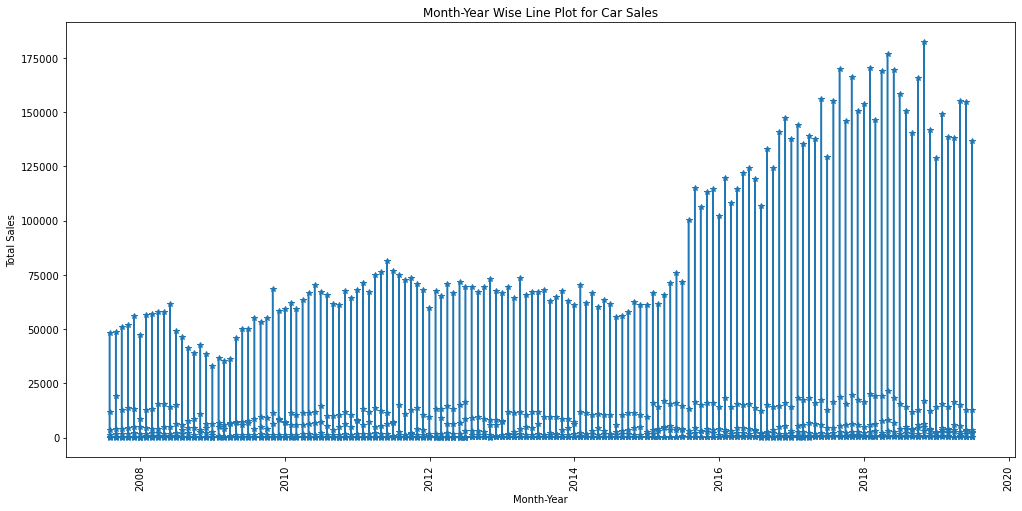

In [16]:
plt.figure(figsize=(17, 8))
plt.plot(new_df.Date, new_df['sales'], marker='*')
plt.title('Month-Year Wise Line Plot for Car Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

In [17]:
new_df.tail()

Date                          Type   sales  \
1099 2019-06-30  MOTORCYCLES & THREE-WHEELERS  136730   
1100 2019-06-30                          None    2356   
1101 2019-06-30                PASSENGER CARS   12661   
1102 2019-06-30                      PICK-Ups    2092   
1103 2019-06-30                        TRUCKS     340   

                                          Manufacturer  Model_number  year  \
1099                                             Honda         87007  2019   
1100  Honda Cars                        (Civic & City)          2171  2019   
1101                                      Suzuki Swift           439  2019   
1102                                     Suzuki Ravi.P          1146  2019   
1103                                            Hino.T            88  2019   

      day  month  day_of_week  quarter  season  
1099   30      6            6        2       2  
1100   30      6            6        2       2  
1101   30      6            6        2       2  
1102   30      6            6        2       2  
1103   30      6            6        2       2

In [18]:

new_df.Type.value_counts()

BUSES                           144
FARM TRACTORS                   144
LCVS, VANS & JEEPS (4X4)        144
MOTORCYCLES & THREE-WHEELERS    144
PASSENGER CARS                  144
PICK-Ups                        144
TRUCKS                          144
None                             96
Name: Type, dtype: int64

In [19]:
new_df[new_df.Type=="None"]

Date  Type  sales  \
4    2007-07-31  None      7   
12   2007-08-31  None      7   
20   2007-09-30  None      1   
28   2007-10-31  None      4   
36   2007-11-30  None      3   
...         ...   ...    ...   
1068 2019-02-28  None   3469   
1076 2019-03-31  None   3660   
1084 2019-04-30  None   2546   
1092 2019-05-31  None   2846   
1100 2019-06-30  None   2356   

                                          Manufacturer  Model_number  year  \
4                                      Suzuki Potohar              0  2007   
12                                     Suzuki Potohar              0  2007   
20                                     Suzuki Potohar              0  2007   
28                                     Suzuki Potohar              0  2007   
36                                     Suzuki Potohar              0  2007   
...                                                ...           ...   ...   
1068  Honda Cars                        (Civic & City)          2908  2019   
1076  Honda Cars                        (Civic & City)          3484  2019   
1084  Honda Cars                        (Civic & City)          3065  2019   
1092  Honda Cars                        (Civic & City)          2885  2019   
1100  Honda Cars                        (Civic & City)          2171  2019   

      day  month  day_of_week  quarter  season  
4      31      7            1        3       2  
12     31      8            4        3       2  
20     30      9            6        3       3  
28     31     10            2        4       3  
36     30     11            4        4       3  
...   ...    ...          ...      ...     ...  
1068   28      2            3        1       0  
1076   31      3            6        1       1  
1084   30      4            1        2       1  
1092   31      5            4        2       1  
1100   30      6            6        2       2  

[96 rows x 11 columns]

In [20]:
new_df.replace("None","Others",inplace=True)

In [21]:
new_df.head()

Date                          Type  sales     Manufacturer  \
0 2007-07-31                         BUSES    120           Hino.B   
1 2007-07-31                 FARM TRACTORS   3457             Fiat   
2 2007-07-31      LCVS, VANS & JEEPS (4X4)     39   Sigma Defender   
3 2007-07-31  MOTORCYCLES & THREE-WHEELERS  48164            Honda   
4 2007-07-31                        Others      7  Suzuki Potohar    

   Model_number  year  day  month  day_of_week  quarter  season  
0           108  2007   31      7            1        3       2  
1          1902  2007   31      7            1        3       2  
2            46  2007   31      7            1        3       2  
3         32200  2007   31      7            1        3       2  
4             0  2007   31      7            1        3       2

* Now our dataset is ready to visualize.

#  5. Data Visualization 

In [22]:
# Here for understanding about trends ans seasonal, I have created seperate dataframe of Dates and sales.
# and using seasonal_decompose() functions, I have visulized the trends


sales_decompose=new_df[["Date","sales"]]

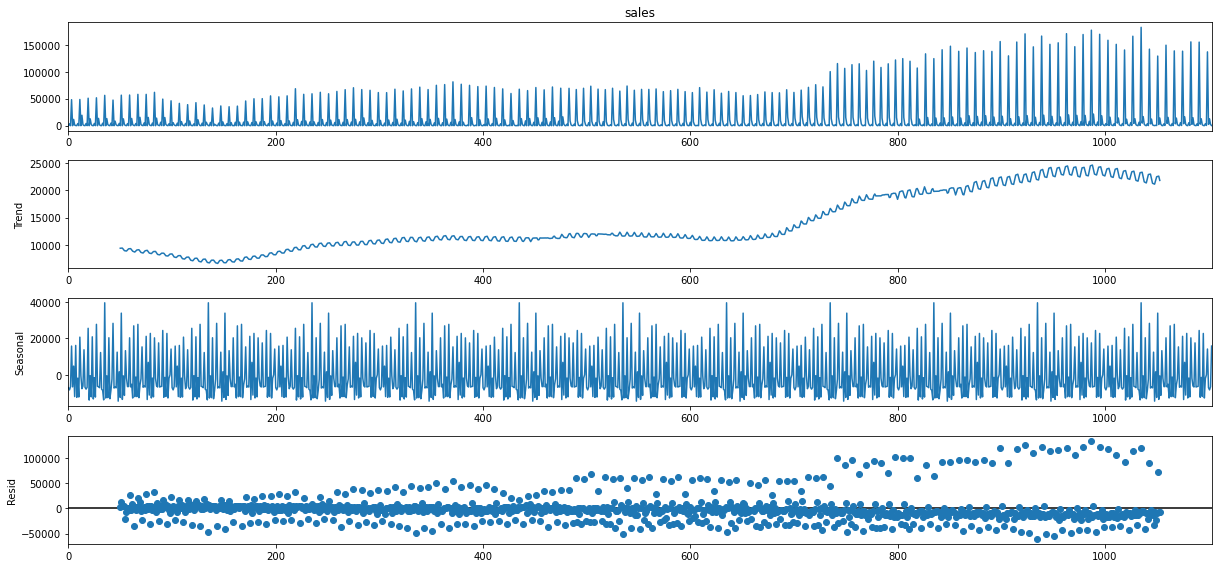

In [23]:
rcParams['figure.figsize'] = 17,8
decomposition =seasonal_decompose(sales_decompose.sales,period=100)
fig = decomposition.plot()
plt.show()

In [24]:
# Group by month-year and calculate the sum of sales
Month_year_df = df.groupby('Date')['sales'].sum().reset_index()
Month_year_df

Date   sales
0   2007-07-31   64903
1   2007-08-31   74092
2   2007-09-30   69963
3   2007-10-31   71340
4   2007-11-30   76550
..         ...     ...
139 2019-02-28  163061
140 2019-03-31  167109
141 2019-04-30  180554
142 2019-05-31  176723
143 2019-06-30  158337

[144 rows x 2 columns]

In [25]:
fig = px.line(x=Month_year_df.Date,y=Month_year_df.sales,labels={"x":"Date","y":"Sales"})
fig.show()

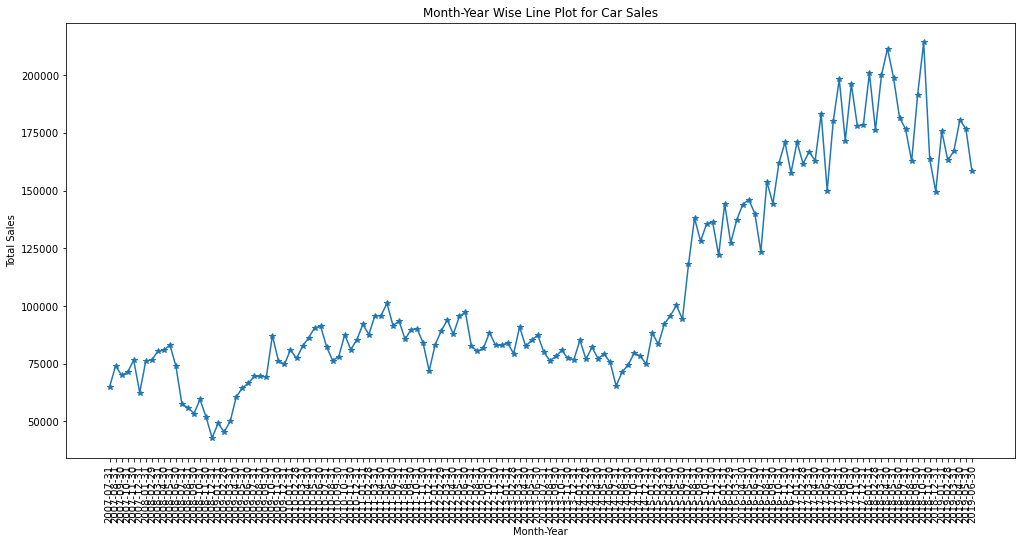

In [26]:
plt.figure(figsize=(17, 8))
plt.plot(Month_year_df['Date'].astype(str), Month_year_df['sales'], marker='*')
plt.title('Month-Year Wise Line Plot for Car Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

In [27]:
fig=px.box(x=Month_year_df['Date'].astype(str),y=Month_year_df.sales)
fig.show()

In [28]:
fig=px.bar(Month_year_df,x=Month_year_df['Date'].astype(str),y="sales")
fig.show()

In [29]:
average_sales = new_df.groupby('year')['sales'].mean().reset_index(name='Average_Sales')
average_sales

year  Average_Sales
0   2007    8736.291667
1   2008    8253.739583
2   2009    8152.197917
3   2010   10410.843750
4   2011   11236.583333
5   2012   11624.033333
6   2013   11652.726190
7   2014   10956.297619
8   2015   15860.178571
9   2016   19454.188889
10  2017   21850.447917
11  2018   23199.166667
12  2019   21281.604167

#### Line Plot

In [30]:
fig = px.line(x=average_sales.year,y=average_sales.Average_Sales,labels={"x":"year","y":"avg Sales"})
fig.show()

* Here we can say, from 2007 to 2019 the trend of the vehical of this company is increasing rapidly.

#### Bar graph

In [31]:
fig=px.bar(new_df,x=new_df.year,y="sales")
fig.show()

#### Box plot

In [32]:
fig = px.box(x=new_df.year,y=new_df.sales,labels={"x":"Year","y":"sales"})
fig.show()

In [33]:
yearly_sum_sales=new_df.groupby("year")["sales"].sum()
yearly_sum_sale_df=pd.DataFrame({"Year":yearly_sum_sales.index,"Sales":yearly_sum_sales.values})
yearly_sum_sale_df

Year    Sales
0   2007   419342
1   2008   792359
2   2009   782611
3   2010   999441
4   2011  1078712
5   2012  1046163
6   2013   978829
7   2014   920329
8   2015  1332255
9   2016  1750877
10  2017  2097643
11  2018  2227120
12  2019  1021517

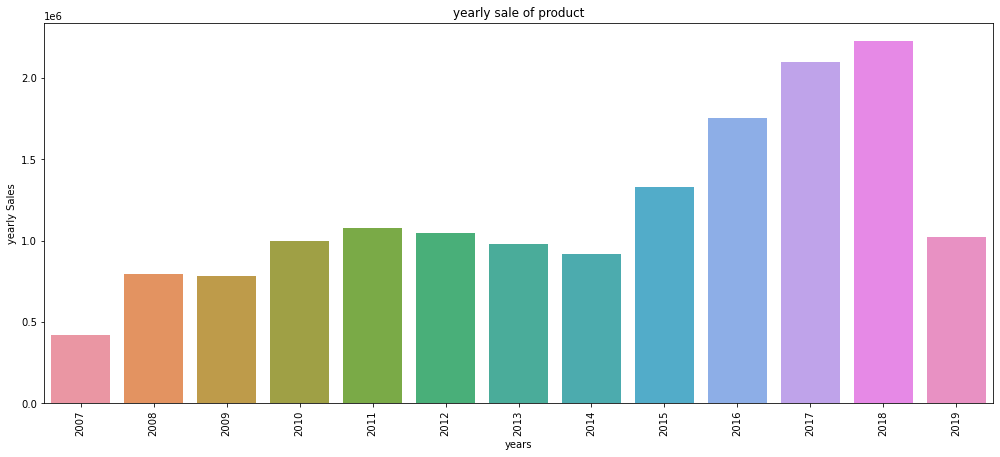

In [34]:
plt.figure(figsize=(17,7))
sns.barplot(yearly_sum_sale_df.Year,yearly_sum_sale_df.Sales)
plt.xticks(rotation=90)
plt.title('yearly sale of product')
plt.xlabel('years')
plt.ylabel('yearly Sales')
plt.show()

In [35]:
sorted_yearly_sum_sale_df=yearly_sum_sale_df.sort_values(by="Sales",ascending=False)
sorted_yearly_sum_sale_df.set_index('Year', inplace=True)
sorted_yearly_sum_sale_df

Sales
Year         
2018  2227120
2017  2097643
2016  1750877
2015  1332255
2011  1078712
2012  1046163
2019  1021517
2010   999441
2013   978829
2014   920329
2008   792359
2009   782611
2007   419342

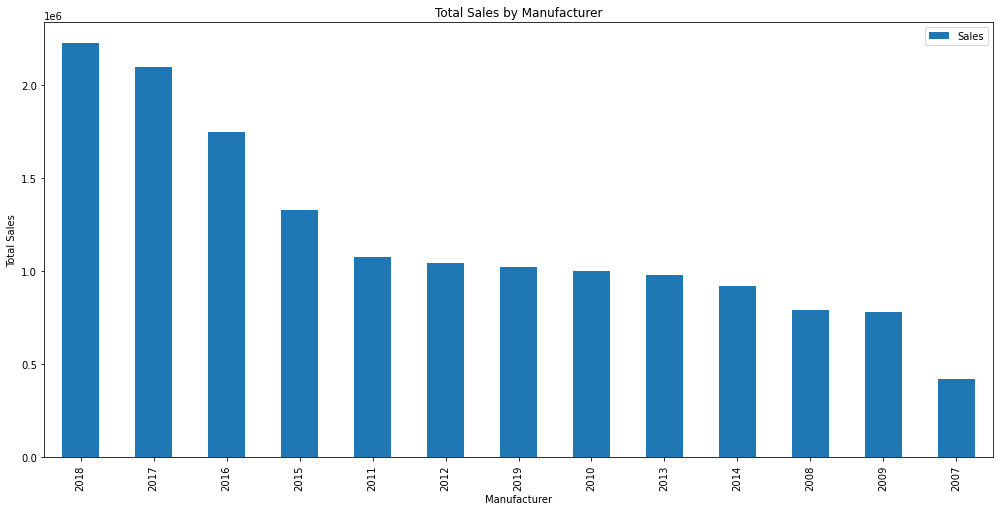

In [36]:
sorted_yearly_sum_sale_df.plot(kind='bar',)
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.title('Total Sales by Manufacturer')
plt.show()

* Here we can clealy say that, maximum units are sold in 2018 and less in 2007.

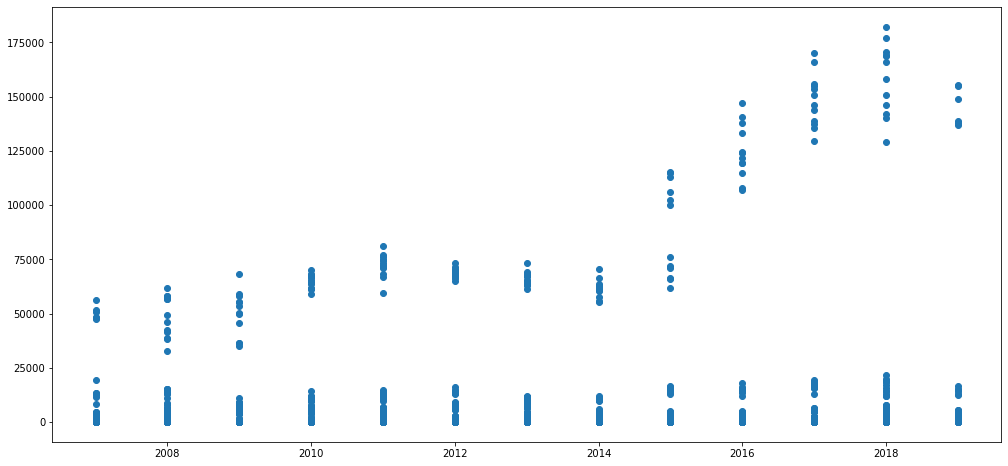

In [37]:
plt.scatter(new_df.year, new_df.sales)

### 2018 sale analysis

In [38]:
sale_2018=new_df[new_df["year"]==2018]
sale_2018

Date                          Type   sales  \
960  2018-01-31                         BUSES      54   
961  2018-01-31                 FARM TRACTORS    5863   
962  2018-01-31      LCVS, VANS & JEEPS (4X4)     500   
963  2018-01-31  MOTORCYCLES & THREE-WHEELERS  170456   
964  2018-01-31                        Others     465   
...         ...                           ...     ...   
1051 2018-12-31  MOTORCYCLES & THREE-WHEELERS  128959   
1052 2018-12-31                        Others    2142   
1053 2018-12-31                PASSENGER CARS   14152   
1054 2018-12-31                      PICK-Ups    2773   
1055 2018-12-31                        TRUCKS     301   

                                          Manufacturer  Model_number  year  \
960                                             Hino.B             8  2018   
961                                               Fiat          2770  2018   
962                                         HONDA BR-V           452  2018   
963                                              Honda        100000  2018   
964                                    TOYOTA Fortuner           452  2018   
...                                                ...           ...   ...   
1051                                             Honda         80553  2018   
1052  Honda Cars                        (Civic & City)          1979  2018   
1053                                      Suzuki Swift           124  2018   
1054                                     Suzuki Ravi.P           888  2018   
1055                                            Hino.T           112  2018   

      day  month  day_of_week  quarter  season  
960    31      1            2        1       0  
961    31      1            2        1       0  
962    31      1            2        1       0  
963    31      1            2        1       0  
964    31      1            2        1       0  
...   ...    ...          ...      ...     ...  
1051   31     12            0        4       4  
1052   31     12            0        4       4  
1053   31     12            0        4       4  
1054   31     12            0        4       4  
1055   31     12            0        4       4  

[96 rows x 11 columns]

In [39]:
series_2018=sale_2018[["Date","sales"]]
series_2018

Date   sales
960  2018-01-31      54
961  2018-01-31    5863
962  2018-01-31     500
963  2018-01-31  170456
964  2018-01-31     465
...         ...     ...
1051 2018-12-31  128959
1052 2018-12-31    2142
1053 2018-12-31   14152
1054 2018-12-31    2773
1055 2018-12-31     301

[96 rows x 2 columns]

In [40]:
series_2018.set_index("Date",inplace=True)
series_2018.head()

sales
Date              
2018-01-31      54
2018-01-31    5863
2018-01-31     500
2018-01-31  170456
2018-01-31     465

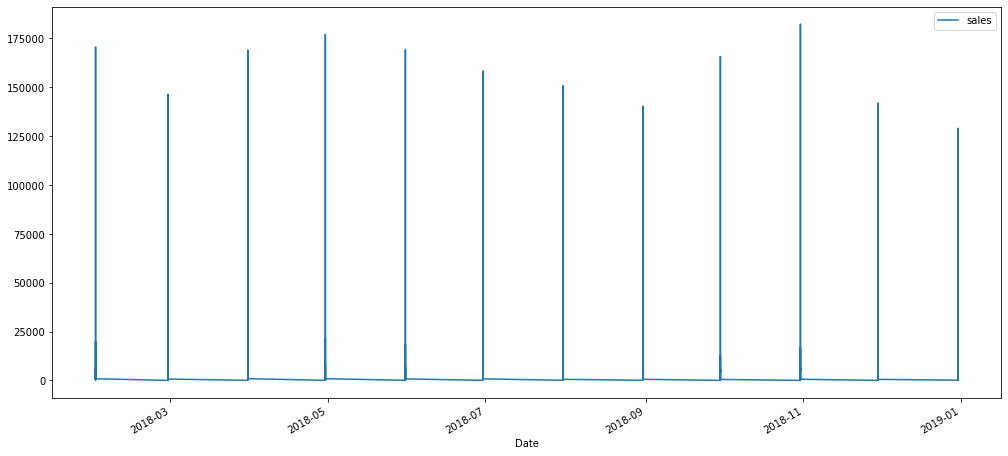

In [41]:
series_2018.plot()
plt.show()

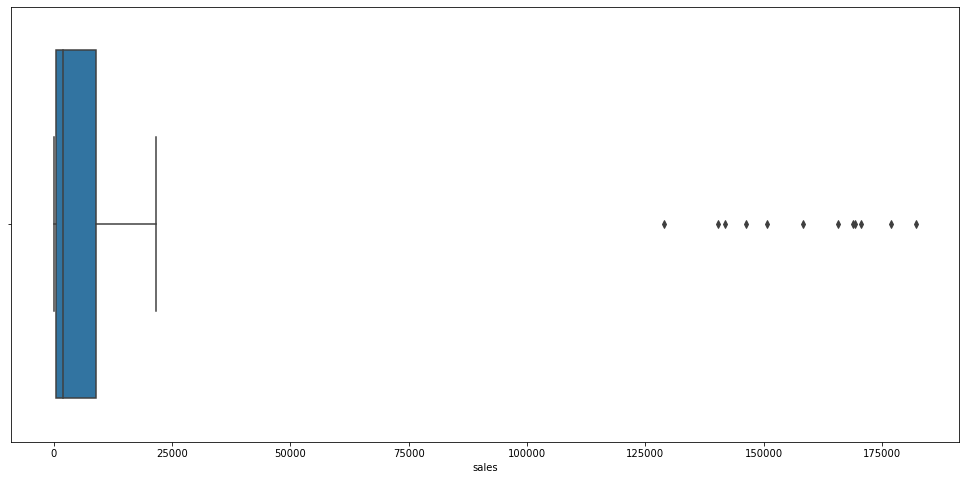

In [42]:
sns.boxplot(sale_2018.sales)

In [43]:
sale_2018.head(1)

Date   Type  sales Manufacturer  Model_number  year  day  month  \
960 2018-01-31  BUSES     54       Hino.B             8  2018   31      1   

     day_of_week  quarter  season  
960            2        1       0

In [44]:
type_sale_2018=sale_2018.groupby("Type")["sales"].sum()
type_sale_2018_df=pd.DataFrame({"Type":type_sale_2018.index,"Sales":type_sale_2018.values})
type_sale_2018_df

Type    Sales
0                         BUSES      998
1                 FARM TRACTORS    63060
2      LCVS, VANS & JEEPS (4X4)     6019
3  MOTORCYCLES & THREE-WHEELERS  1899662
4                        Others    25585
5                PASSENGER CARS   195608
6                      PICK-Ups    27884
7                        TRUCKS     8304

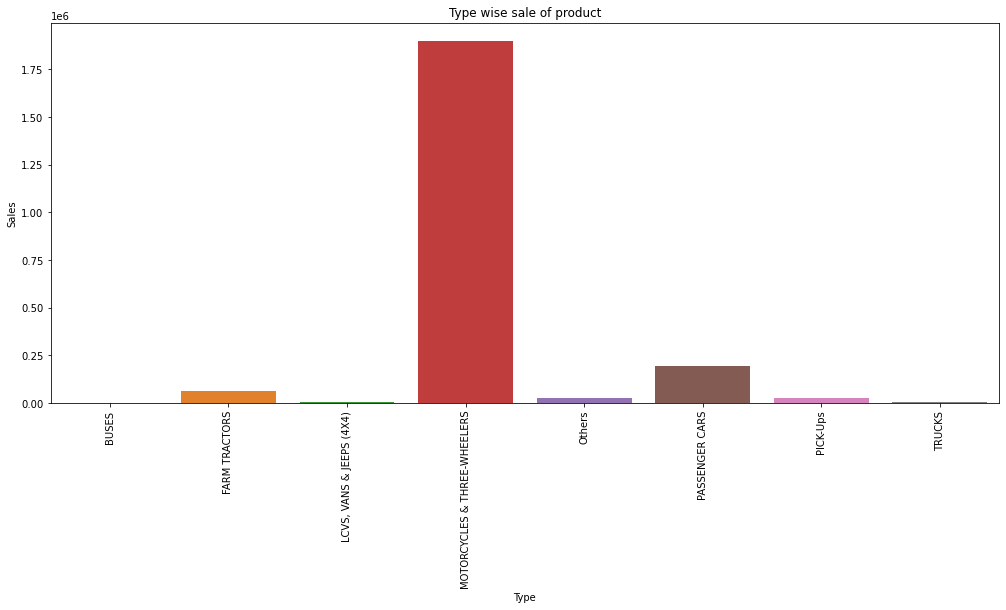

In [45]:
plt.figure(figsize=(17,7))
sns.barplot(type_sale_2018_df.Type,type_sale_2018_df.Sales)
plt.xticks(rotation=90)
plt.title('Type wise sale of product')
plt.xlabel('Type')
plt.ylabel("Sales")
plt.show()

In [46]:
sale_2018.Manufacturer.value_counts()

Hino.B                                              12
Fiat                                                12
HONDA BR-V                                          12
Honda                                               12
Suzuki Ravi.P                                       12
Hino.T                                              12
TOYOTA Fortuner                                      6
Honda Cars (Civic & City)                            6
Honda Cars                        (Civic & City)     6
Suzuki Swift                                         6
Name: Manufacturer, dtype: int64

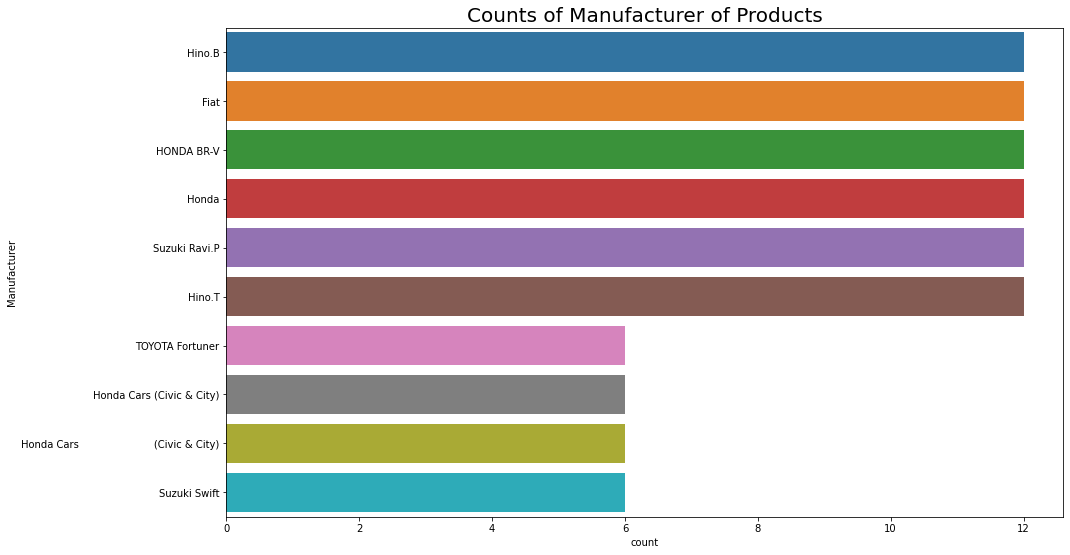

In [47]:
plt.figure(figsize=(15,9))
sns.countplot(y="Manufacturer",data=sale_2018,order=sale_2018.Manufacturer.value_counts().index[:])
plt.title("Counts of Manufacturer of Products",size=20)
plt.show()

In [48]:
# Manufacturer of sales of each unit

Manu_sale_2018=sale_2018.groupby("Manufacturer")["sales"].sum()
Manu_sale_2018_df=pd.DataFrame({"Manufacturer":Manu_sale_2018.index,"Sales":Manu_sale_2018.values})
Manu_sale_2018_df

Manufacturer    Sales
0                                              Fiat    63060
1                                        HONDA BR-V     6019
2                                            Hino.B      998
3                                            Hino.T     8304
4                                             Honda  1899662
5  Honda Cars                        (Civic & City)    23037
6                         Honda Cars (Civic & City)   113354
7                                     Suzuki Ravi.P    27884
8                                      Suzuki Swift    82254
9                                   TOYOTA Fortuner     2548

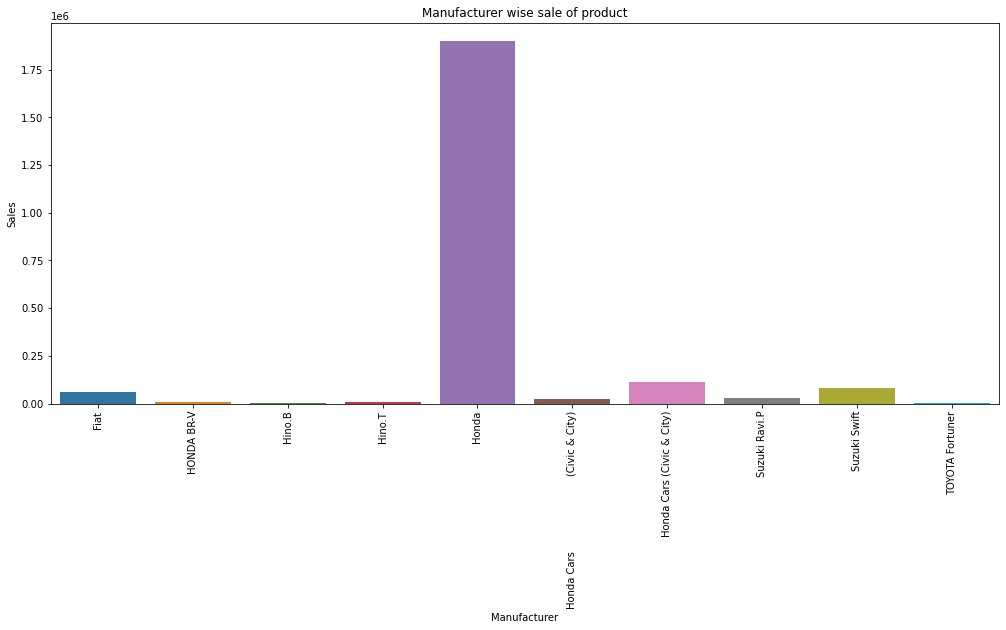

In [49]:
plt.figure(figsize=(17,7))
sns.barplot(Manu_sale_2018_df.Manufacturer,Manu_sale_2018_df.Sales)
plt.xticks(rotation=90)
plt.title('Manufacturer wise sale of product')
plt.xlabel('Manufacturer')
plt.ylabel("Sales")
plt.show()

In [50]:
sum_of_sales_2018 = sale_2018.groupby(['Type', 'Manufacturer'])['sales'].sum()
sum_of_sales_2018_df = sum_of_sales_2018.reset_index(name='Total_Sales')
sum_of_sales_2018_df

Type  \
0                         BUSES   
1                 FARM TRACTORS   
2      LCVS, VANS & JEEPS (4X4)   
3  MOTORCYCLES & THREE-WHEELERS   
4                        Others   
5                        Others   
6                PASSENGER CARS   
7                PASSENGER CARS   
8                      PICK-Ups   
9                        TRUCKS   

                                       Manufacturer  Total_Sales  
0                                            Hino.B          998  
1                                              Fiat        63060  
2                                        HONDA BR-V         6019  
3                                             Honda      1899662  
4  Honda Cars                        (Civic & City)        23037  
5                                   TOYOTA Fortuner         2548  
6                         Honda Cars (Civic & City)       113354  
7                                      Suzuki Swift        82254  
8                                     Suzuki Ravi.P        27884  
9                                            Hino.T         8304

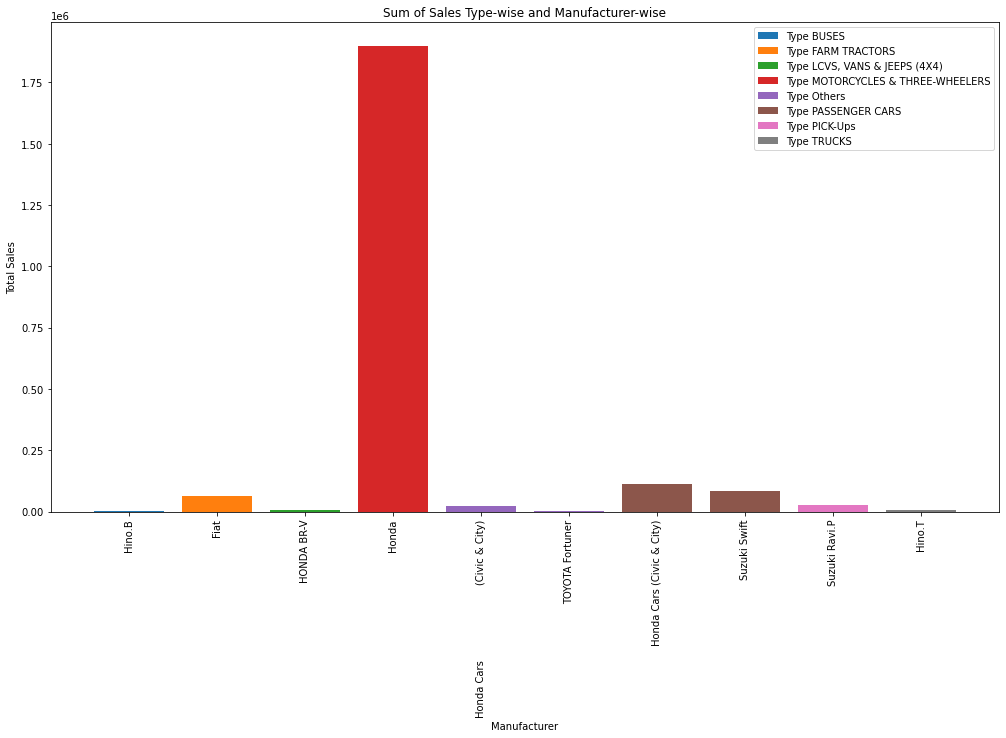

In [51]:
plt.figure(figsize=(17, 9))
for typ, group in sum_of_sales_2018_df.groupby('Type'):
    plt.bar(group['Manufacturer'], group['Total_Sales'], label=f'Type {typ}')
plt.xticks(rotation=90)
plt.title('Sum of Sales Type-wise and Manufacturer-wise')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

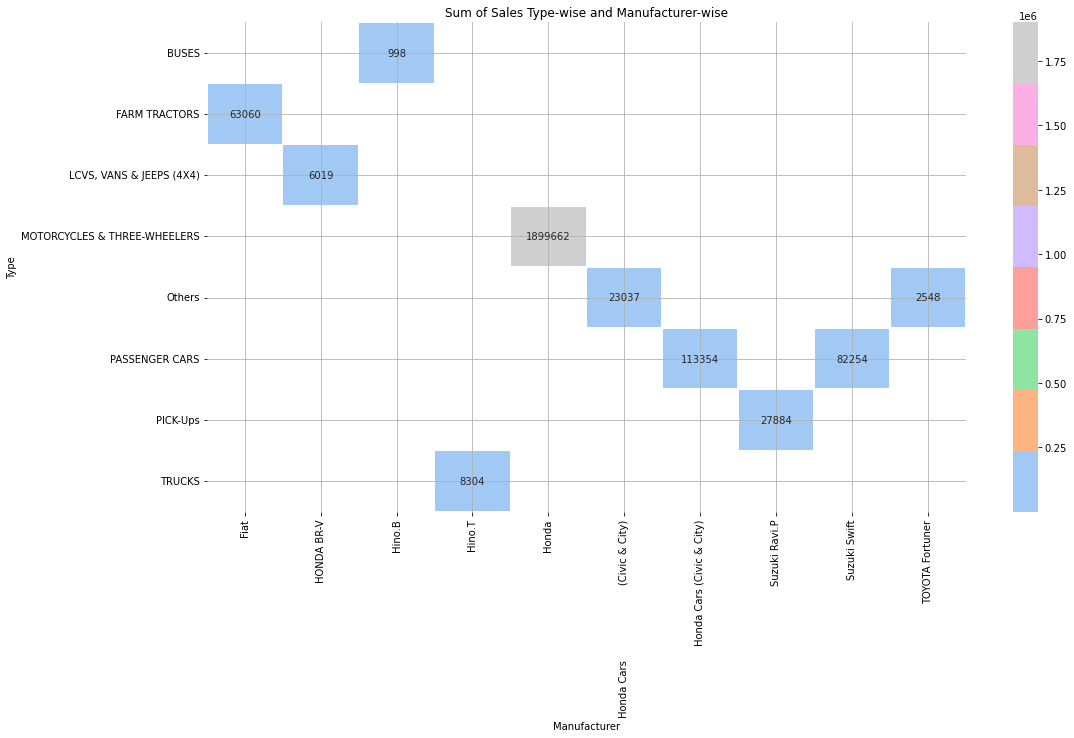

In [52]:
pivot_table = sum_of_sales_2018_df.pivot(index="Type", columns="Manufacturer", values="Total_Sales")
plt.figure(figsize=(17, 9))
colors = sns.color_palette("pastel", n_colors=len(sum_of_sales_2018_df["Type"].unique()))

sns.heatmap(pivot_table, annot=True, cmap=colors, fmt=".0f", linewidths=.5)
plt.title("Sum of Sales Type-wise and Manufacturer-wise")
plt.xlabel("Manufacturer")
plt.ylabel("Type")
plt.grid(True)
plt.show()

In [53]:
monthly_sale=sale_2018.groupby("month")["sales"].sum()
monthly_sales_2018_df=pd.DataFrame({"Months":monthly_sale.index,"Sales":monthly_sale.values})
monthly_sales_2018_df=monthly_sales_2018_df.sort_values(by="Sales",ascending=False)
monthly_sales_2018_df.set_index("Months", inplace=True)
monthly_sales_2018_df

Sales
Months        
10      214145
4       211504
1       200819
3       199926
5       198835
9       191546
6       181583
7       176630
2       176197
11      163665
8       162742
12      149528

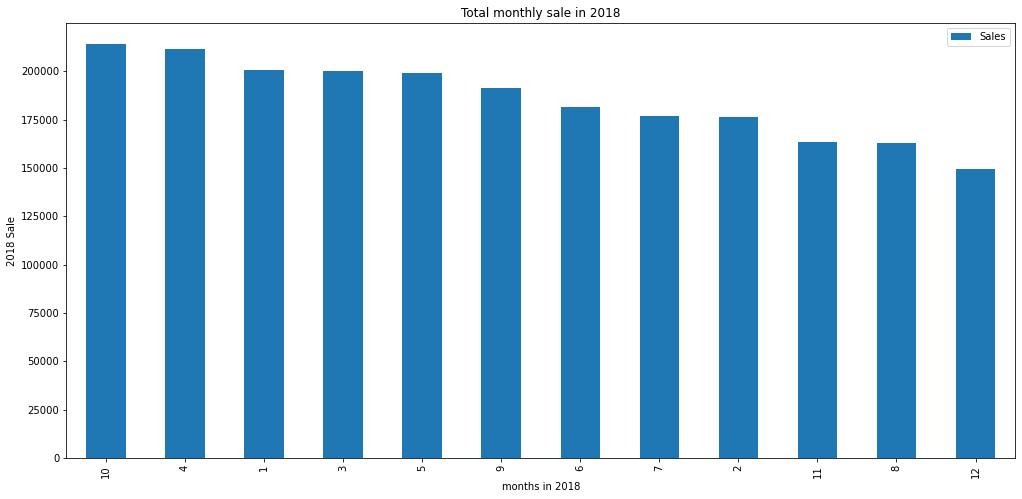

In [54]:
monthly_sales_2018_df.plot(kind='bar',)
plt.xlabel('months in 2018')
plt.ylabel('2018 Sale')
plt.title('Total monthly sale in 2018')
plt.show()

* Maximum units are sold in October 2018.

### That's all about 2018 Analysis.

In [55]:
# Here are Total counts of each Manufacturer.
new_df.Manufacturer.value_counts()

Fiat                                                144
Honda                                               144
Suzuki Ravi.P                                       144
Hino.T                                              144
Hino.B                                              132
Honda Civic                                          96
Sigma Defender                                       60
Suzuki Potohar                                       60
Toyota Fortuner                                      48
Honda Cars (Civic & City)                            36
HONDA BR-V                                           36
TOYOTA Fortuner                                      24
Hino                                                 12
Honda Cars                        (Civic & City)     12
Suzuki Swift                                         12
Name: Manufacturer, dtype: int64

In [56]:
# Total unit are sold from each Manufacturer

manu_sales=new_df.groupby("Manufacturer")["sales"].sum()
Manufaturer_sale_df=manu_sales.reset_index(name='sales')
Manufaturer_sale_df

Manufacturer     sales
0                                               Fiat    645261
1                                         HONDA BR-V     15888
2                                               Hino      2663
3                                             Hino.B      8584
4                                             Hino.T     52286
5                                              Honda  12602001
6   Honda Cars                        (Civic & City)     42198
7                          Honda Cars (Civic & City)    583712
8                                        Honda Civic   1044786
9                                     Sigma Defender      4829
10                                   Suzuki Potohar         35
11                                     Suzuki Ravi.P    266426
12                                      Suzuki Swift    168441
13                                   TOYOTA Fortuner      5561
14                                   Toyota Fortuner      4527

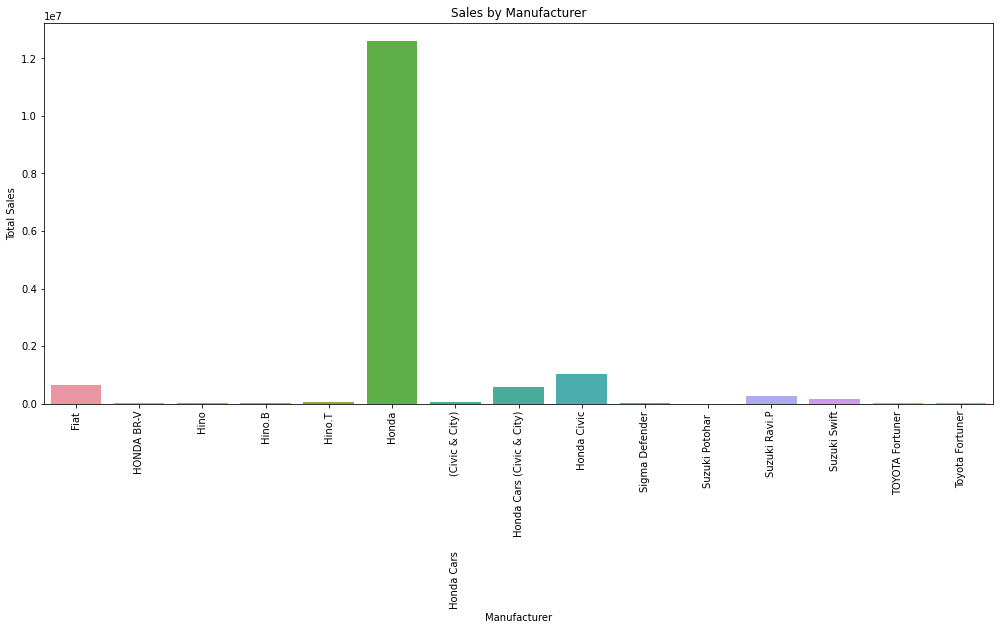

In [57]:
plt.figure(figsize=(17,7))
sns.barplot(Manufaturer_sale_df.Manufacturer,Manufaturer_sale_df["sales"])
plt.xticks(rotation=90)
plt.title('Sales by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.show()

In [58]:
Manufaturer_sale_df[Manufaturer_sale_df.Manufacturer=="Honda"]

Manufacturer     sales
5        Honda  12602001

* And here we can say that, Manufacturer who sold maximum units of products is Honda. and that maximum units are 12602001.

In [59]:
manufacturer_sales=new_df.groupby("Manufacturer")["sales"].sum()
manufacturer_sales

Manufacturer
Fiat                                                  645261
HONDA BR-V                                             15888
Hino                                                    2663
Hino.B                                                  8584
Hino.T                                                 52286
Honda                                               12602001
Honda Cars                        (Civic & City)       42198
Honda Cars (Civic & City)                             583712
Honda Civic                                          1044786
Sigma Defender                                          4829
Suzuki Potohar                                            35
Suzuki Ravi.P                                         266426
Suzuki Swift                                          168441
TOYOTA Fortuner                                         5561
Toyota Fortuner                                         4527
Name: sales, dtype: int64

In [60]:
sorted_sales = manufacturer_sales.sort_values(ascending=False)
sorted_sales

Manufacturer
Honda                                               12602001
Honda Civic                                          1044786
Fiat                                                  645261
Honda Cars (Civic & City)                             583712
Suzuki Ravi.P                                         266426
Suzuki Swift                                          168441
Hino.T                                                 52286
Honda Cars                        (Civic & City)       42198
HONDA BR-V                                             15888
Hino.B                                                  8584
TOYOTA Fortuner                                         5561
Sigma Defender                                          4829
Toyota Fortuner                                         4527
Hino                                                    2663
Suzuki Potohar                                            35
Name: sales, dtype: int64

In [61]:
manufacturer_sales_df = pd.DataFrame({'Manufacturer': sorted_sales.index, 'Total Sales': sorted_sales.values})
manufacturer_sales_df

Manufacturer  Total Sales
0                                              Honda     12602001
1                                        Honda Civic      1044786
2                                               Fiat       645261
3                          Honda Cars (Civic & City)       583712
4                                      Suzuki Ravi.P       266426
5                                       Suzuki Swift       168441
6                                             Hino.T        52286
7   Honda Cars                        (Civic & City)        42198
8                                         HONDA BR-V        15888
9                                             Hino.B         8584
10                                   TOYOTA Fortuner         5561
11                                    Sigma Defender         4829
12                                   Toyota Fortuner         4527
13                                              Hino         2663
14                                   Suzuki Potohar            35

In [62]:
top_20_sales = manufacturer_sales_df.head(20)
top_20_sales

Manufacturer  Total Sales
0                                              Honda     12602001
1                                        Honda Civic      1044786
2                                               Fiat       645261
3                          Honda Cars (Civic & City)       583712
4                                      Suzuki Ravi.P       266426
5                                       Suzuki Swift       168441
6                                             Hino.T        52286
7   Honda Cars                        (Civic & City)        42198
8                                         HONDA BR-V        15888
9                                             Hino.B         8584
10                                   TOYOTA Fortuner         5561
11                                    Sigma Defender         4829
12                                   Toyota Fortuner         4527
13                                              Hino         2663
14                                   Suzuki Potohar            35

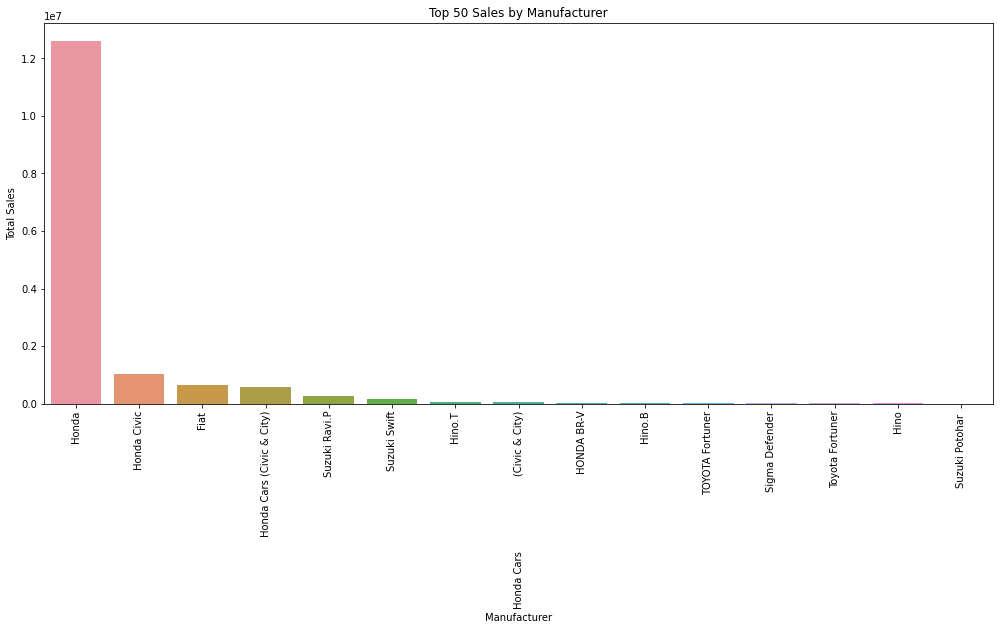

In [63]:
plt.figure(figsize=(17,7))
sns.barplot(top_20_sales.Manufacturer,top_20_sales["Total Sales"])
plt.xticks(rotation=90)
plt.title('Top 50 Sales by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.show()

In [64]:
Type_manufacturer_sales=new_df.groupby(["Type","Manufacturer"])["sales"].sum()
Type_manufacturer_sales

Type                          Manufacturer                                    
BUSES                         Hino                                                    2663
                              Hino.B                                                  8584
FARM TRACTORS                 Fiat                                                  645261
LCVS, VANS & JEEPS (4X4)      HONDA BR-V                                             15888
                              Sigma Defender                                          4829
                              Toyota Fortuner                                         4527
MOTORCYCLES & THREE-WHEELERS  Honda                                               12602001
Others                        Honda Cars                        (Civic & City)       42198
                              Suzuki Potohar                                            35
                              TOYOTA Fortuner                                         5561
PASSENGER C

* Here are Type of vahical and Manufacturer of vehical wise sales of each vehical.

In [65]:
Type_manufacturer_sales_df = Type_manufacturer_sales.reset_index(name='sales')
Type_manufacturer_sales_df

Type  \
0                          BUSES   
1                          BUSES   
2                  FARM TRACTORS   
3       LCVS, VANS & JEEPS (4X4)   
4       LCVS, VANS & JEEPS (4X4)   
5       LCVS, VANS & JEEPS (4X4)   
6   MOTORCYCLES & THREE-WHEELERS   
7                         Others   
8                         Others   
9                         Others   
10                PASSENGER CARS   
11                PASSENGER CARS   
12                PASSENGER CARS   
13                      PICK-Ups   
14                        TRUCKS   

                                        Manufacturer     sales  
0                                               Hino      2663  
1                                             Hino.B      8584  
2                                               Fiat    645261  
3                                         HONDA BR-V     15888  
4                                     Sigma Defender      4829  
5                                    Toyota Fortuner      4527  
6                                              Honda  12602001  
7   Honda Cars                        (Civic & City)     42198  
8                                    Suzuki Potohar         35  
9                                    TOYOTA Fortuner      5561  
10                         Honda Cars (Civic & City)    583712  
11                                       Honda Civic   1044786  
12                                      Suzuki Swift    168441  
13                                     Suzuki Ravi.P    266426  
14                                            Hino.T     52286

In [66]:
new_df.Model_number.value_counts()

0        84
42       11
36       10
30       10
24        9
         ..
727       1
38939     1
1036      1
48440     1
1146      1
Name: Model_number, Length: 741, dtype: int64

In [67]:
Model_sales=new_df.groupby("Model_number")["sales"].sum()
Model_sales

Model_number
0          48719
1              2
2             18
4            420
5            106
           ...  
100652    155215
104886    169298
108718    168883
109503    182205
115972    176931
Name: sales, Length: 741, dtype: int64

In [68]:
sorted_model_sales = Model_sales.sort_values(ascending=False)
sorted_model_sales

Model_number
109503    182205
115972    176931
100000    170456
95200     170058
104886    169298
           ...  
65            27
2             18
13            13
7              7
1              2
Name: sales, Length: 741, dtype: int64

In [69]:
model_sales_df = pd.DataFrame({'Model_number': sorted_model_sales.index, 'Total_Sales': sorted_model_sales.values})
model_sales_df

Model_number  Total_Sales
0          109503       182205
1          115972       176931
2          100000       170456
3           95200       170058
4          104886       169298
..            ...          ...
736            65           27
737             2           18
738            13           13
739             7            7
740             1            2

[741 rows x 2 columns]

In [70]:
top_50_model_sales = model_sales_df.head(50)
top_50_model_sales

Model_number  Total_Sales
0         109503       182205
1         115972       176931
2         100000       170456
3          95200       170058
4         104886       169298
5         108718       168883
6          92422       166001
7          95224       165719
8          91470       158224
9          90800       155855
10        100652       155215
11         92210       154943
12         99877       154782
13         90822       153528
14         93672       150690
15         91063       150664
16         92812       149107
17         84000       147204
18         84556       146310
19         80500       146018
20         86100       143871
21         90350       141770
22         80600       140644
23         80007       140243
24         53200       140198
25         86000       138877
26         94320       138555
27         94670       138010
28         53000       137762
29         84400       137750
30         86600       137550
31         87007       136730
32         81350       135507
33         45000       133572
34         76600       133093
35         71200       129342
36         80553       128959
37         73000       124236
38         72700       124219
39         73400       121708
40         72600       119515
41         62200       119363
42         40800       118633
43         67000       115085
44         70002       114666
45         70188       114613
46         70075       112958
47         66000       107870
48         60290       106823
49         64100       106146

In [71]:
top_50_model_sales_sorted=top_50_model_sales.set_index("Model_number")
top_50_model_sales_sorted

Total_Sales
Model_number             
109503             182205
115972             176931
100000             170456
95200              170058
104886             169298
108718             168883
92422              166001
95224              165719
91470              158224
90800              155855
100652             155215
92210              154943
99877              154782
90822              153528
93672              150690
91063              150664
92812              149107
84000              147204
84556              146310
80500              146018
86100              143871
90350              141770
80600              140644
80007              140243
53200              140198
86000              138877
94320              138555
94670              138010
53000              137762
84400              137750
86600              137550
87007              136730
81350              135507
45000              133572
76600              133093
71200              129342
80553              128959
73000              124236
72700              124219
73400              121708
72600              119515
62200              119363
40800              118633
67000              115085
70002              114666
70188              114613
70075              112958
66000              107870
60290              106823
64100              106146

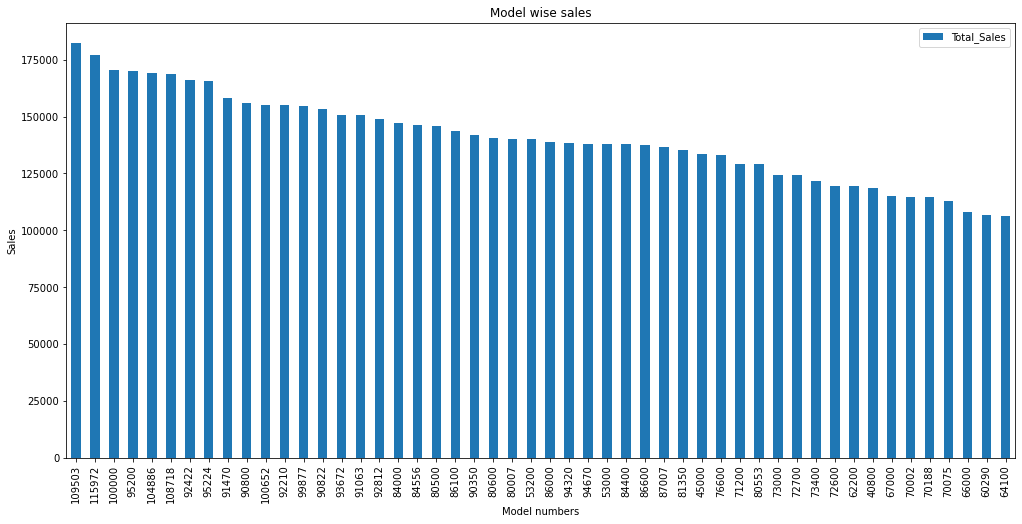

In [72]:
top_50_model_sales_sorted.plot(kind='bar',)
plt.xlabel('Model numbers')
plt.ylabel('Sales')
plt.title('Model wise sales')
plt.show()

In [73]:
label_encoder=LabelEncoder()
new_df["Manufacturer"]=label_encoder.fit_transform(new_df.Manufacturer)
new_df["Type"]=label_encoder.fit_transform(new_df.Type)
new_df

Date  Type   sales  Manufacturer  Model_number  year  day  month  \
0    2007-07-31     0     120             3           108  2007   31      7   
1    2007-07-31     1    3457             0          1902  2007   31      7   
2    2007-07-31     2      39             9            46  2007   31      7   
3    2007-07-31     3   48164             5         32200  2007   31      7   
4    2007-07-31     4       7            10             0  2007   31      7   
...         ...   ...     ...           ...           ...   ...  ...    ...   
1099 2019-06-30     3  136730             5         87007  2019   30      6   
1100 2019-06-30     4    2356             6          2171  2019   30      6   
1101 2019-06-30     5   12661            12           439  2019   30      6   
1102 2019-06-30     6    2092            11          1146  2019   30      6   
1103 2019-06-30     7     340             4            88  2019   30      6   

      day_of_week  quarter  season  
0               1        3       2  
1               1        3       2  
2               1        3       2  
3               1        3       2  
4               1        3       2  
...           ...      ...     ...  
1099            6        2       2  
1100            6        2       2  
1101            6        2       2  
1102            6        2       2  
1103            6        2       2  

[1104 rows x 11 columns]

In [74]:
new_df.corr()

Type     sales  Manufacturer  Model_number      year  \
Type          1.000000e+00 -0.049237  4.422202e-01     -0.071435 -0.002735   
sales        -4.923666e-02  1.000000 -8.695044e-02      0.984061  0.153667   
Manufacturer  4.422202e-01 -0.086950  1.000000e+00     -0.099505 -0.068140   
Model_number -7.143452e-02  0.984061 -9.950465e-02      1.000000  0.132447   
year         -2.734806e-03  0.153667 -6.813951e-02      0.132447  1.000000   
day           5.272567e-17  0.003077  1.227115e-03      0.001606 -0.051436   
month        -1.716887e-17 -0.011126  1.710687e-16     -0.010876 -0.122486   
day_of_week  -1.680174e-04 -0.002939 -2.147091e-03      0.000039  0.033653   
quarter      -2.077345e-18 -0.009889  8.720923e-17     -0.009384 -0.126063   
season       -1.169761e-18 -0.011257  4.978721e-17     -0.011289 -0.116160   

                       day         month  day_of_week       quarter  \
Type          5.272567e-17 -1.716887e-17    -0.000168 -2.077345e-18   
sales         3.077138e-03 -1.112572e-02    -0.002939 -9.888601e-03   
Manufacturer  1.227115e-03  1.710687e-16    -0.002147  8.720923e-17   
Model_number  1.606189e-03 -1.087564e-02     0.000039 -9.383562e-03   
year         -5.143618e-02 -1.224859e-01     0.033653 -1.260629e-01   
day           1.000000e+00  2.483407e-01    -0.002567  2.861116e-01   
month         2.483407e-01  1.000000e+00    -0.021856  9.716254e-01   
day_of_week  -2.566592e-03 -2.185559e-02     1.000000 -2.707343e-02   
quarter       2.861116e-01  9.716254e-01    -0.027073  1.000000e+00   
season        2.847263e-01  9.748791e-01    -0.023830  9.214427e-01   

                    season  
Type         -1.169761e-18  
sales        -1.125674e-02  
Manufacturer  4.978721e-17  
Model_number -1.128908e-02  
year         -1.161597e-01  
day           2.847263e-01  
month         9.748791e-01  
day_of_week  -2.382960e-02  
quarter       9.214427e-01  
season        1.000000e+00

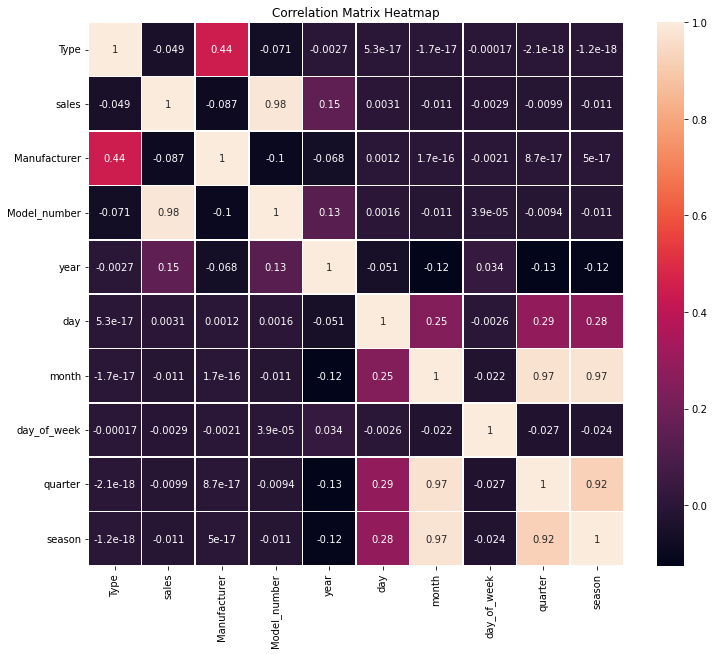

In [75]:
plt.figure(figsize=(12, 10))
sns.heatmap(new_df.corr(), annot=True,  linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [76]:
new_df.columns

Index(['Date', 'Type', 'sales', 'Manufacturer', 'Model_number', 'year', 'day',
       'month', 'day_of_week', 'quarter', 'season'],
      dtype='object')

In [77]:
moving_avg_50=new_df.sales.rolling(50).mean()     # mean of first 50 values and put it in 51 th observation and so on..
moving_avg_50

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1099    23055.46
1100    23095.02
1101    20769.06
1102    20768.06
1103    20491.82
Name: sales, Length: 1104, dtype: float64

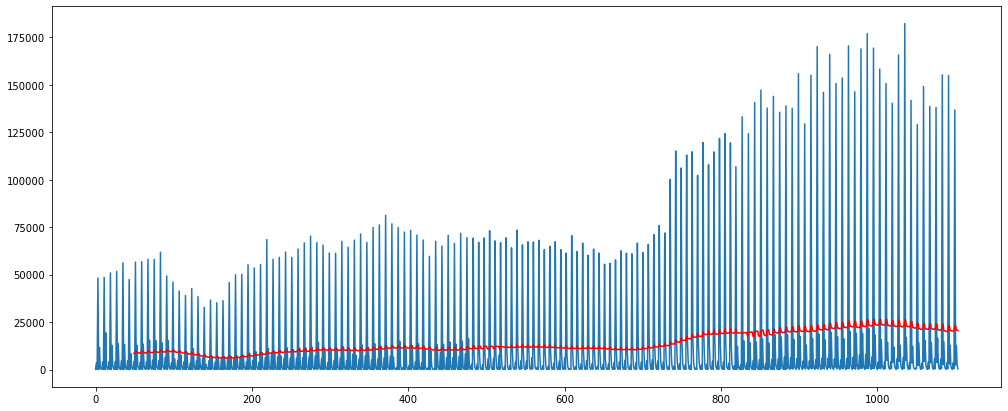

In [78]:
plt.figure(figsize=(17,7))
plt.plot(new_df.sales)
plt.plot(moving_avg_50,color="red")
plt.show()

# 6. Data splitting

In [79]:
X=new_df[["Date","Model_number", "Manufacturer", "Type","day", "month",
       "year", "day_of_week", "quarter", "season"]]
X.set_index("Date",inplace=True)
X.head()

Model_number  Manufacturer  Type  day  month  year  day_of_week  \
Date                                                                          
2007-07-31           108             3     0   31      7  2007            1   
2007-07-31          1902             0     1   31      7  2007            1   
2007-07-31            46             9     2   31      7  2007            1   
2007-07-31         32200             5     3   31      7  2007            1   
2007-07-31             0            10     4   31      7  2007            1   

            quarter  season  
Date                         
2007-07-31        3       2  
2007-07-31        3       2  
2007-07-31        3       2  
2007-07-31        3       2  
2007-07-31        3       2

In [80]:
y=new_df[["Date","sales"]]
y.set_index("Date",inplace=True)
y.head()

sales
Date             
2007-07-31    120
2007-07-31   3457
2007-07-31     39
2007-07-31  48164
2007-07-31      7

# 7. Data Scaling

In [81]:
scaler=MinMaxScaler()
scaled_X=scaler.fit_transform(X)
scaled_X=pd.DataFrame(scaled_X,columns=X.columns,index=X.index)
scaled_X

Model_number  Manufacturer      Type       day     month  year  \
Date                                                                         
2007-07-31      0.000931      0.214286  0.000000  1.000000  0.545455   0.0   
2007-07-31      0.016401      0.000000  0.142857  1.000000  0.545455   0.0   
2007-07-31      0.000397      0.642857  0.285714  1.000000  0.545455   0.0   
2007-07-31      0.277653      0.357143  0.428571  1.000000  0.545455   0.0   
2007-07-31      0.000000      0.714286  0.571429  1.000000  0.545455   0.0   
...                  ...           ...       ...       ...       ...   ...   
2019-06-30      0.750241      0.357143  0.428571  0.666667  0.454545   1.0   
2019-06-30      0.018720      0.428571  0.571429  0.666667  0.454545   1.0   
2019-06-30      0.003785      0.857143  0.714286  0.666667  0.454545   1.0   
2019-06-30      0.009882      0.785714  0.857143  0.666667  0.454545   1.0   
2019-06-30      0.000759      0.285714  1.000000  0.666667  0.454545   1.0   

            day_of_week   quarter  season  
Date                                       
2007-07-31     0.166667  0.666667     0.5  
2007-07-31     0.166667  0.666667     0.5  
2007-07-31     0.166667  0.666667     0.5  
2007-07-31     0.166667  0.666667     0.5  
2007-07-31     0.166667  0.666667     0.5  
...                 ...       ...     ...  
2019-06-30     1.000000  0.333333     0.5  
2019-06-30     1.000000  0.333333     0.5  
2019-06-30     1.000000  0.333333     0.5  
2019-06-30     1.000000  0.333333     0.5  
2019-06-30     1.000000  0.333333     0.5  

[1104 rows x 9 columns]

In [82]:
scaled_y=scaler.fit_transform(y)
scaled_y=pd.DataFrame(scaled_y,columns=y.columns,index=y.index)
scaled_y

sales
Date                
2007-07-31  0.000659
2007-07-31  0.018973
2007-07-31  0.000214
2007-07-31  0.264340
2007-07-31  0.000038
...              ...
2019-06-30  0.750418
2019-06-30  0.012930
2019-06-30  0.069488
2019-06-30  0.011482
2019-06-30  0.001866

[1104 rows x 1 columns]

In [83]:
train_X=scaled_X.head(4500)
train_y=scaled_y.head(4500)

In [84]:
test_X=scaled_X.tail(1260)
test_y=scaled_y.tail(1260)

In [85]:
train_X.shape, train_y.shape

((1104, 9), (1104, 1))

In [86]:
test_y

sales
Date                
2007-07-31  0.000659
2007-07-31  0.018973
2007-07-31  0.000214
2007-07-31  0.264340
2007-07-31  0.000038
...              ...
2019-06-30  0.750418
2019-06-30  0.012930
2019-06-30  0.069488
2019-06-30  0.011482
2019-06-30  0.001866

[1104 rows x 1 columns]

In [87]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((1104, 9), (1104, 1), (1104, 9), (1104, 1))

# 8. Model Building

### 1.XGBoost model

In [88]:
reg=XGBRegressor(n_estimater=1000,learning_rate=0.1)
reg.fit(train_X, train_y, eval_set=[(train_X, train_y),(test_X,test_y)], verbose=True)

[0]	validation_0-rmse:0.15963	validation_1-rmse:0.15963
[1]	validation_0-rmse:0.14441	validation_1-rmse:0.14441
[2]	validation_0-rmse:0.13071	validation_1-rmse:0.13071
[3]	validation_0-rmse:0.11835	validation_1-rmse:0.11835
[4]	validation_0-rmse:0.10720	validation_1-rmse:0.10720
[5]	validation_0-rmse:0.09715	validation_1-rmse:0.09715
[6]	validation_0-rmse:0.08808	validation_1-rmse:0.08808
[7]	validation_0-rmse:0.07989	validation_1-rmse:0.07989
[8]	validation_0-rmse:0.07252	validation_1-rmse:0.07252
[9]	validation_0-rmse:0.06585	validation_1-rmse:0.06585
[10]	validation_0-rmse:0.05983	validation_1-rmse:0.05983
[11]	validation_0-rmse:0.05443	validation_1-rmse:0.05443
[12]	validation_0-rmse:0.04953	validation_1-rmse:0.04953
[13]	validation_0-rmse:0.04511	validation_1-rmse:0.04511
[14]	validation_0-rmse:0.04114	validation_1-rmse:0.04114
[15]	validation_0-rmse:0.03755	validation_1-rmse:0.03755
[16]	validation_0-rmse:0.03433	validation_1-rmse:0.03433
[17]	validation_0-rmse:0.03143	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimater=1000, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [89]:
reg.feature_importances_

array([7.9414451e-01, 1.2943136e-02, 5.4095075e-02, 5.6371005e-04,
       2.0925507e-03, 1.3547745e-01, 6.8353012e-04, 0.0000000e+00,
       0.0000000e+00], dtype=float32)

In [90]:
feature_imp=pd.DataFrame(data=reg.feature_importances_,index=reg.feature_names_in_, columns=["Importance"])
feature_imp

Importance
Model_number    0.794145
Manufacturer    0.012943
Type            0.054095
day             0.000564
month           0.002093
year            0.135477
day_of_week     0.000684
quarter         0.000000
season          0.000000

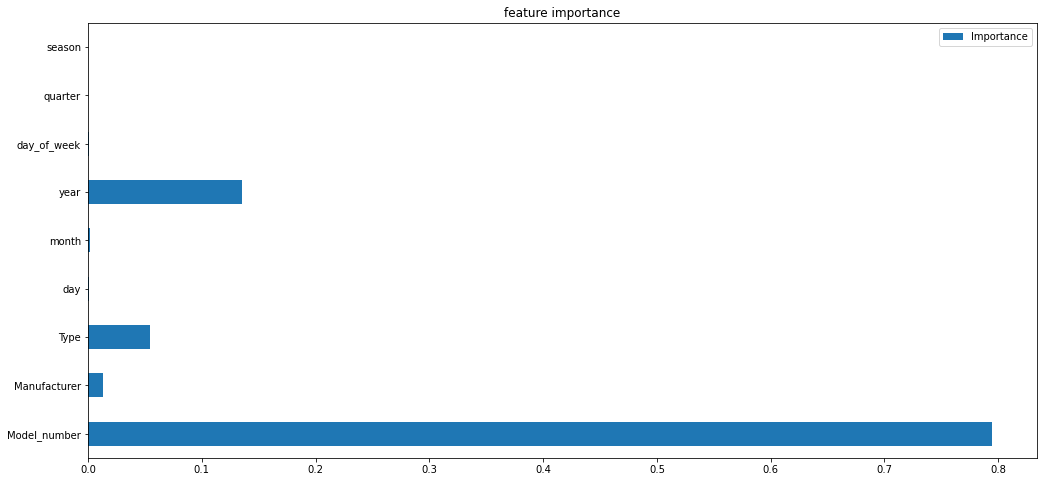

In [91]:
feature_imp.plot(kind="barh",title="feature importance")

In [92]:
def RMSE(actual, pred,):
    return np.sqrt(np.mean((actual-pred)**2))
def MAPE(pred,actual):
    return np.mean((np.abs(actual-pred)/actual))*100

In [93]:
# training
train_pred=reg.predict(train_X)
train_pred=pd.DataFrame(data=train_pred,columns=train_y.columns,index=train_y.index)

r2_score_train_reg=r2_score(train_y, train_pred)
r2_score_train_reg

0.9997122551370567

In [94]:
reg_rmse_train=RMSE(train_y, train_pred)
reg_mape_train=MAPE(train_y, train_pred)
reg_mape_train.values[0]

33.25178834299094

In [95]:
# testing
reg_test_pred=reg.predict(test_X)
reg_test_pred=pd.DataFrame(data=reg_test_pred,columns=test_y.columns,index=test_y.index)
reg_test_pred

sales
Date                
2007-07-31  0.000523
2007-07-31  0.018938
2007-07-31  0.000287
2007-07-31  0.263169
2007-07-31  0.000190
...              ...
2019-06-30  0.751344
2019-06-30  0.014540
2019-06-30  0.073855
2019-06-30  0.011143
2019-06-30  0.002276

[1104 rows x 1 columns]

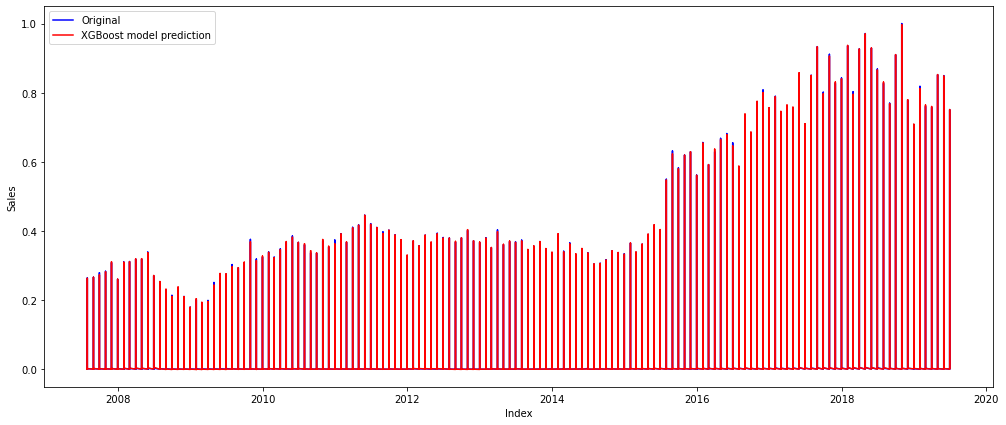

In [96]:
plt.figure(figsize=(17,7))
plt.plot(test_y.sales,color="blue",label="Original")
plt.plot(reg_test_pred,color="red",label="XGBoost model prediction")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()

<function matplotlib.pyplot.show(*args, **kw)>

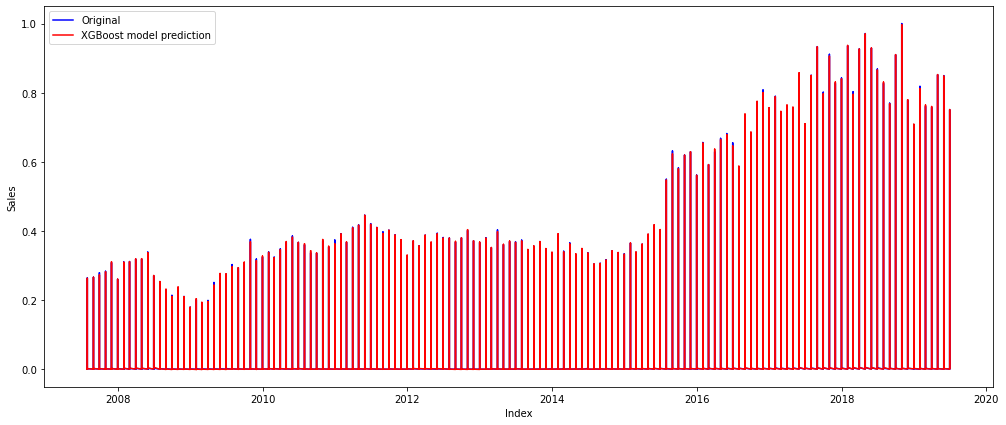

In [97]:
plt.figure(figsize=(17,7))
plt.plot(test_y.sales,color="blue",label="Original")
plt.plot(reg_test_pred,color="red",label="XGBoost model prediction")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.show

In [98]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, reg_test_pred)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
rmse

Mean Squared Error: 8.963582169612919e-06


0.0029939242090629013

In [99]:
reg_mape=MAPE(test_y, reg_test_pred)

In [100]:
reg_rmse=RMSE(test_y, reg_test_pred)

In [101]:
r2_score_test_reg=r2_score(test_y, reg_test_pred)
r2_score_test_reg

0.9997122551370567

### 2. SVM Regressor

#### Hyperparameter tuning

In [102]:
from sklearn.model_selection import GridSearchCV

regressor=GridSearchCV(SVR(gamma="auto"), {"C":[0.5,1,1.5,2],"kernel":["rbf","linear","poly"]},
                       cv=5,return_train_score=False)
regressor.fit(train_X,train_y)
results=regressor.cv_results_

In [103]:
results

{'mean_fit_time': array([0.00692067, 0.00541582, 0.00771341, 0.00346336, 0.00312433,
        0.00728884, 0.0031251 , 0.00936131, 0.00713944, 0.00346327,
        0.00768099, 0.00770745]),
 'std_fit_time': array([0.00147295, 0.00138913, 0.00804064, 0.00692673, 0.00624866,
        0.00894138, 0.00625019, 0.00797027, 0.0066783 , 0.00692654,
        0.00966115, 0.00540049]),
 'mean_score_time': array([0.00334449, 0.0018362 , 0.00262074, 0.00280261, 0.00312834,
        0.00220308, 0.00312805, 0.00010123, 0.00241909, 0.00280161,
        0.        , 0.00165   ]),
 'std_score_time': array([0.00312836, 0.00075997, 0.00524149, 0.00560522, 0.00625668,
        0.00440617, 0.0062561 , 0.00020247, 0.00483818, 0.00560322,
        0.        , 0.00083004]),
 'param_C': masked_array(data=[0.5, 0.5, 0.5, 1, 1, 1, 1.5, 1.5, 1.5, 2, 2, 2],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=ob

In [104]:
regressor.best_params_

{'C': 1, 'kernel': 'rbf'}

In [105]:
SVM_model=SVR(kernel="rbf",C=1)
SVM_model.fit(train_X,train_y)

SVR(C=1)

In [106]:
# training
svm_train_pred=SVM_model.predict(train_X)
svm_train_pred=pd.DataFrame(data=svm_train_pred,columns=train_y.columns,index=train_y.index)

svm_rmse_train=RMSE(train_y, svm_train_pred)
svm_mape_train=MAPE(train_y, svm_train_pred)
r2_score_train_svm=r2_score(train_y, svm_train_pred)
r2_score_train_svm

0.8764360158213352

In [107]:
svm_test_pred=SVM_model.predict(test_X)
svm_test_pred=pd.DataFrame(data=svm_test_pred,columns=test_y.columns,index=test_y.index)
svm_test_pred

sales
Date                
2007-07-31  0.092236
2007-07-31  0.099847
2007-07-31  0.090357
2007-07-31  0.198850
2007-07-31  0.090029
...              ...
2019-06-30  0.737362
2019-06-30  0.099151
2019-06-30  0.105260
2019-06-30  0.105326
2019-06-30  0.092047

[1104 rows x 1 columns]

<function matplotlib.pyplot.show(*args, **kw)>

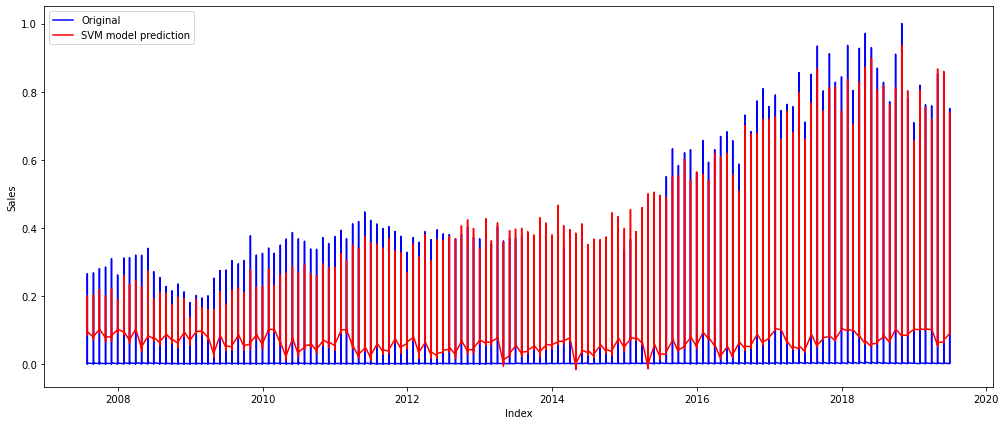

In [108]:
plt.figure(figsize=(17,7))
plt.plot(test_y.sales,color="blue",label="Original")
plt.plot(svm_test_pred,color="red",label="SVM model prediction")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.show

In [109]:
svm_mape=MAPE(test_y, svm_test_pred)
svm_mape

sales    81.337802
dtype: float64

In [110]:
svm_rmse=RMSE(test_y, svm_test_pred)
svm_rmse

sales    0.062042
dtype: float64

In [111]:
r2_score_test_svm=r2_score(test_y, svm_test_pred)
r2_score_test_svm

0.8764360158213352

### 3. KNN Algorithm

In [112]:
KNN_model=KNeighborsRegressor(n_neighbors=10)
KNN_model.fit(train_X,train_y)

KNeighborsRegressor(n_neighbors=10)

In [113]:
# training
knn_train_pred=KNN_model.predict(train_X)
knn_train_pred=pd.DataFrame(data=knn_train_pred,columns=train_y.columns,index=train_y.index)

knn_rmse_train=RMSE(train_y, knn_train_pred)
knn_mape_train=MAPE(train_y, knn_train_pred)
r2_score_train_knn=r2_score(train_y, knn_train_pred)
r2_score_train_knn

0.9540866504469405

In [114]:
KNN_test_pred=KNN_model.predict(test_X)
KNN_test_pred=pd.DataFrame(data=KNN_test_pred,columns=test_y.columns,index=test_y.index)
KNN_test_pred

sales
Date                
2007-07-31  0.008605
2007-07-31  0.010653
2007-07-31  0.033137
2007-07-31  0.220278
2007-07-31  0.017590
...              ...
2019-06-30  0.709746
2019-06-30  0.042882
2019-06-30  0.021275
2019-06-30  0.022306
2019-06-30  0.020728

[1104 rows x 1 columns]

<function matplotlib.pyplot.show(*args, **kw)>

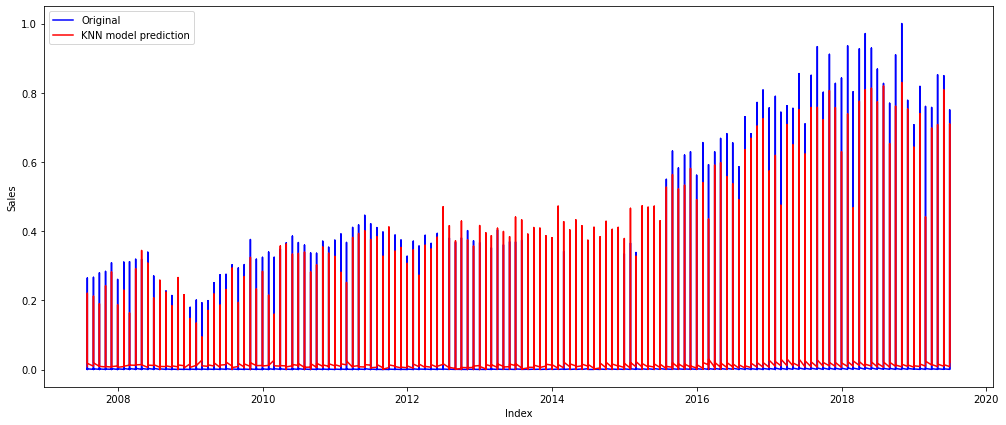

In [115]:
plt.figure(figsize=(17,7))
plt.plot(test_y.sales,color="blue",label="Original")
plt.plot(KNN_test_pred,color="red",label="KNN model prediction")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.show

In [116]:
knn_mape=MAPE(test_y, KNN_test_pred)
knn_mape

sales    74.599175
dtype: float64

In [117]:
knn_rmse=RMSE(test_y, KNN_test_pred)
knn_rmse

sales    0.037819
dtype: float64

In [118]:
r2_score_test_knn=r2_score(test_y, KNN_test_pred)
r2_score_test_knn

0.9540866504469405

### 4. Random Forest

In [119]:
RF_model=RandomForestRegressor(n_estimators=100)
RF_model.fit(train_X,train_y)

RandomForestRegressor()

In [120]:
# training
rf_train_pred=RF_model.predict(train_X)
rf_train_pred=pd.DataFrame(data=rf_train_pred,columns=train_y.columns,index=train_y.index)

rf_rmse_train=RMSE(train_y, rf_train_pred)
rf_mape_train=MAPE(train_y, rf_train_pred)
r2_score_train_rf=r2_score(train_y, rf_train_pred)
r2_score_train_rf

0.9991492568897418

In [121]:
rf_test_pred=RF_model.predict(test_X)
rf_test_pred=pd.DataFrame(data=rf_test_pred,columns=test_y.columns,index=test_y.index)
rf_test_pred

sales
Date                
2007-07-31  0.000680
2007-07-31  0.020727
2007-07-31  0.000247
2007-07-31  0.262531
2007-07-31  0.000035
...              ...
2019-06-30  0.758857
2019-06-30  0.015426
2019-06-30  0.069805
2019-06-30  0.010839
2019-06-30  0.002007

[1104 rows x 1 columns]

<function matplotlib.pyplot.show(*args, **kw)>

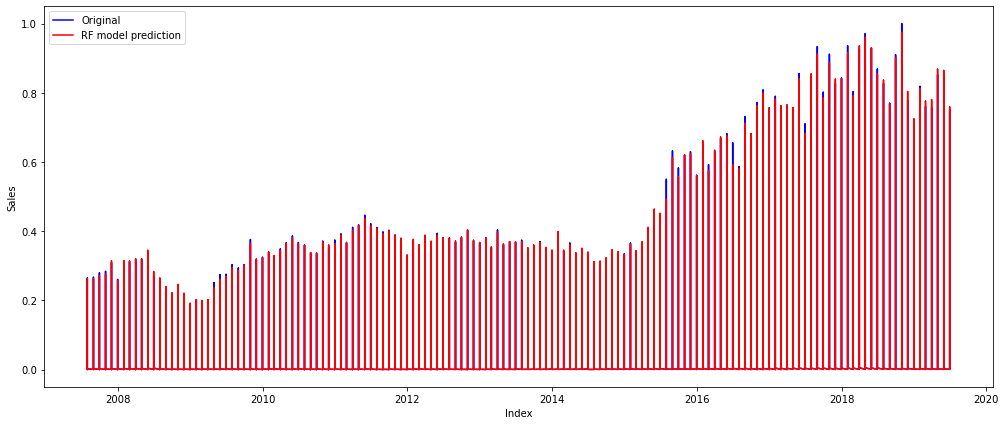

In [122]:
plt.figure(figsize=(17,7))
plt.plot(test_y.sales,color="blue",label="Original")
plt.plot(rf_test_pred,color="red",label="RF model prediction")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.show

In [123]:
RF_rmse=RMSE(test_y, rf_test_pred)
RF_rmse

sales    0.005148
dtype: float64

In [124]:
RF_mape=MAPE(test_y, rf_test_pred)
RF_mape

sales    9.823394
dtype: float64

In [125]:
r2_score_test_rf=r2_score(test_y, rf_test_pred)
r2_score_test_rf

0.9991492568897418

### 5. Adaboost Model

In [126]:
Ada_boost_model=AdaBoostRegressor(n_estimators=5)
Ada_boost_model.fit(train_X,train_y)

AdaBoostRegressor(n_estimators=5)

In [127]:
# training
Ada_train_pred=Ada_boost_model.predict(train_X)
Ada_train_pred=pd.DataFrame(data=Ada_train_pred,columns=train_y.columns,index=train_y.index)

Ada_rmse_train=RMSE(train_y, Ada_train_pred)
Ada_mape_train=MAPE(train_y, Ada_train_pred)
r2_score_train_Ada=r2_score(train_y, Ada_train_pred)
r2_score_train_Ada

0.9800621714285

In [128]:
Ada_test_pred=Ada_boost_model.predict(test_X)
Ada_test_pred=pd.DataFrame(data=Ada_test_pred,columns=test_y.columns,index=test_y.index)
Ada_test_pred

sales
Date                
2007-07-31  0.004234
2007-07-31  0.031249
2007-07-31  0.004234
2007-07-31  0.241443
2007-07-31  0.004234
...              ...
2019-06-30  0.830558
2019-06-30  0.031249
2019-06-30  0.034452
2019-06-30  0.034452
2019-06-30  0.004234

[1104 rows x 1 columns]

<function matplotlib.pyplot.show(*args, **kw)>

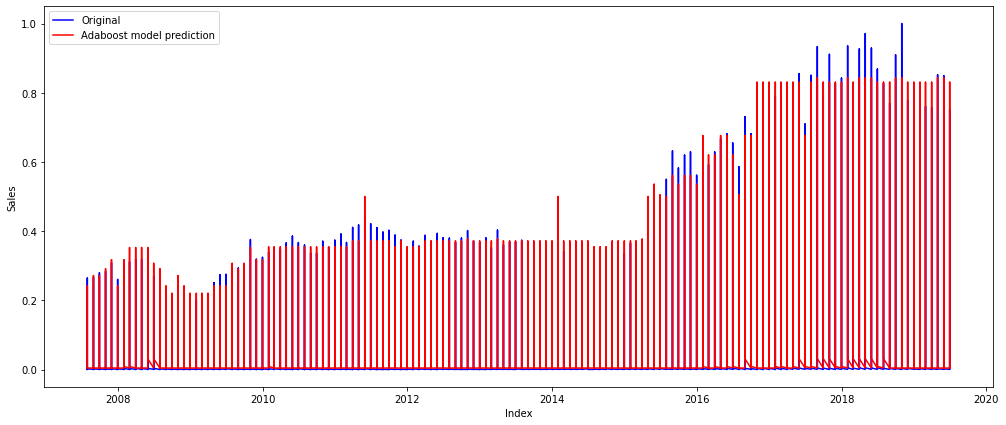

In [129]:
plt.figure(figsize=(17,7))
plt.plot(test_y.sales,color="blue",label="Original")
plt.plot(Ada_test_pred,color="red",label="Adaboost model prediction")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.show

In [130]:
Ada_rmse=RMSE(test_y, Ada_test_pred)
Ada_mape=MAPE(test_y, Ada_test_pred)
Ada_rmse

sales    0.024922
dtype: float64

In [131]:
r2_score_test_Ada=r2_score(test_y, Ada_test_pred)
r2_score_test_Ada

0.9800621714285

### 6. Bagging model

In [132]:
Bagging_model=BaggingRegressor(n_estimators=10,random_state=12)
Bagging_model.fit(train_X,train_y)

BaggingRegressor(random_state=12)

In [133]:
# training
Bagg_train_pred=Bagging_model.predict(train_X)
Bagg_train_pred=pd.DataFrame(data=Bagg_train_pred,columns=train_y.columns,index=train_y.index)

Bgg_rmse_train=RMSE(train_y, Bagg_train_pred)
Bagg_mape_train=MAPE(train_y, Bagg_train_pred)
r2_score_train_Bagg=r2_score(train_y, Bagg_train_pred)
r2_score_train_Bagg

0.9988166971536997

In [134]:
Bagg_test_pred=Bagging_model.predict(test_X)
Bagg_test_pred=pd.DataFrame(data=Bagg_test_pred,columns=test_y.columns,index=test_y.index)
Bagg_test_pred

sales
Date                
2007-07-31  0.000693
2007-07-31  0.020717
2007-07-31  0.000222
2007-07-31  0.260412
2007-07-31  0.000037
...              ...
2019-06-30  0.755263
2019-06-30  0.013199
2019-06-30  0.068903
2019-06-30  0.010989
2019-06-30  0.001865

[1104 rows x 1 columns]

<function matplotlib.pyplot.show(*args, **kw)>

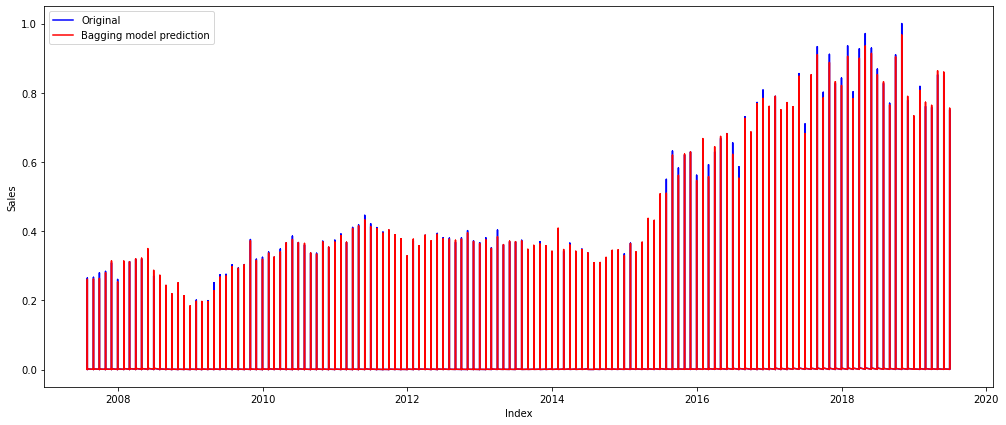

In [135]:
plt.figure(figsize=(17,7))
plt.plot(test_y.sales,color="blue",label="Original")
plt.plot(Bagg_test_pred,color="red",label="Bagging model prediction")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.show

In [136]:
Bagg_rmse=RMSE(test_y, Bagg_test_pred)
Bagg_mape=MAPE(test_y, Bagg_test_pred)
r2_score_test_bagg=r2_score(test_y, Bagg_test_pred)
r2_score_test_bagg

0.9988166971536997

### 7.Votting classifier( DT, SVM, KNN)

In [137]:
estimator=[]

model1=DecisionTreeRegressor()
estimator.append(("DT",model1))

model2=SVR(kernel="linear")
estimator.append(("SVM",model2))

model3=KNeighborsRegressor(n_neighbors=7)
estimator.append(("KNN",model3))
estimator

[('DT', DecisionTreeRegressor()),
 ('SVM', SVR(kernel='linear')),
 ('KNN', KNeighborsRegressor(n_neighbors=7))]

In [138]:
Votting_model=VotingRegressor(estimator)
Votting_model.fit(train_X,train_y)

VotingRegressor(estimators=[('DT', DecisionTreeRegressor()),
                            ('SVM', SVR(kernel='linear')),
                            ('KNN', KNeighborsRegressor(n_neighbors=7))])

In [139]:
# training
Voting_train_pred=Votting_model.predict(train_X)
Voting_train_pred=pd.DataFrame(data=Voting_train_pred,columns=train_y.columns,index=train_y.index)

Vot_rmse_train=RMSE(train_y, Voting_train_pred)
Vot_mape_train=MAPE(train_y, Voting_train_pred)
r2_score_train_Vot=r2_score(train_y, Voting_train_pred)
r2_score_train_Vot

0.9822001080533328

In [140]:
Votting_test_pred=Votting_model.predict(test_X)
Votting_test_pred=pd.DataFrame(data=Votting_test_pred,columns=test_y.columns,index=test_y.index)
Votting_test_pred

sales
Date                
2007-07-31 -0.012696
2007-07-31 -0.001267
2007-07-31 -0.009622
2007-07-31  0.237386
2007-07-31 -0.000599
...              ...
2019-06-30  0.762268
2019-06-30  0.052488
2019-06-30  0.064644
2019-06-30  0.048414
2019-06-30  0.036058

[1104 rows x 1 columns]

<function matplotlib.pyplot.show(*args, **kw)>

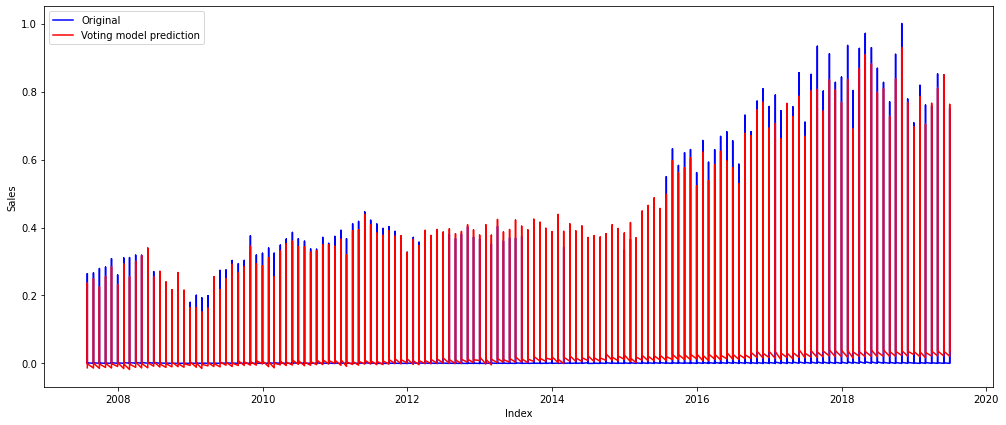

In [141]:
plt.figure(figsize=(17,7))
plt.plot(test_y.sales,color="blue",label="Original")
plt.plot(Votting_test_pred,color="red",label="Voting model prediction")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.show

In [142]:
Voting_rmse_test=RMSE(test_y, Votting_test_pred)
Voting_mape_test=MAPE(test_y, Votting_test_pred)
r2_score_test_voting=r2_score(test_y, Votting_test_pred)
r2_score_test_voting

0.9822001080533328

### 8. LSTM model

In [143]:
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(train_X.shape[1],1)))  #x_train.shape[1]=20, 1 is for Close column
model.add(Dropout(0.1))
model.add(LSTM(units=60,activation="relu",return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=80,activation="relu",return_sequences=True))  
model.add(Dropout(0.3))
model.add(LSTM(units=120,activation="relu"))  
model.add(Dropout(0.4))
model.add(Dense(units=1))

In [144]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 9, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 9, 60)             26640     
                                                                 
 dropout_1 (Dropout)         (None, 9, 60)             0         
                                                                 
 lstm_2 (LSTM)               (None, 9, 80)             45120     
                                                                 
 dropout_2 (Dropout)         (None, 9, 80)             0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [145]:
model.compile(optimizer="adam",loss="mse")
model.fit(train_X,train_y,epochs=100)

Epoch 1/100
35/35 [==============================] - 4s 16ms/step - loss: 0.0311
Epoch 2/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0294
Epoch 3/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0138
Epoch 4/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0062
Epoch 5/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0043
Epoch 6/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0054
Epoch 7/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0029
Epoch 8/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0031
Epoch 9/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0034
Epoch 10/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0025
Epoch 11/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0032
Epoch 12/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0022
Epoch 13/100
35/35 [=====

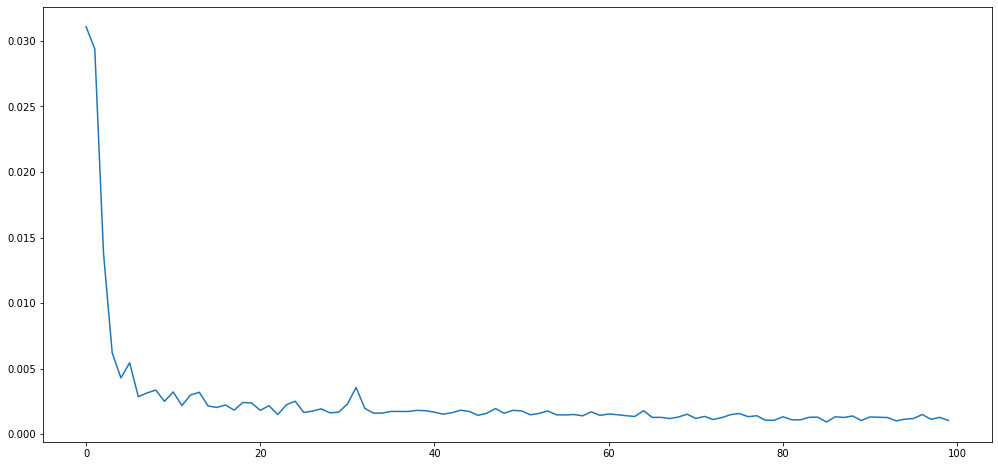

In [146]:
loss=model.history.history["loss"]
plt.plot(loss)
plt.show()

In [147]:
Seq_train_pred=model.predict(train_X)
Seq_train_pred=pd.DataFrame(data=Seq_train_pred,columns=train_y.columns,index=train_y.index)

seq_rmse_train=RMSE(train_y, Seq_train_pred)
seq_mape_train=MAPE(train_y, Seq_train_pred)
r2_score_train_seq=r2_score(train_y, Seq_train_pred)
r2_score_train_seq

35/35 [==============================] - 1s 6ms/step


0.9840605769673706

In [148]:
seq_test_pred=Votting_model.predict(test_X)
seq_test_pred=pd.DataFrame(data=seq_test_pred,columns=test_y.columns,index=test_y.index)
seq_test_pred

sales
Date                
2007-07-31 -0.012696
2007-07-31 -0.001267
2007-07-31 -0.009622
2007-07-31  0.237386
2007-07-31 -0.000599
...              ...
2019-06-30  0.762268
2019-06-30  0.052488
2019-06-30  0.064644
2019-06-30  0.048414
2019-06-30  0.036058

[1104 rows x 1 columns]

In [149]:
seq_rmse_test=RMSE(test_y, seq_test_pred)
seq_mape_test=MAPE(test_y, seq_test_pred)
r2_score_test_seq=r2_score(test_y, seq_test_pred)
r2_score_test_seq

0.9822001080533328

<function matplotlib.pyplot.show(*args, **kw)>

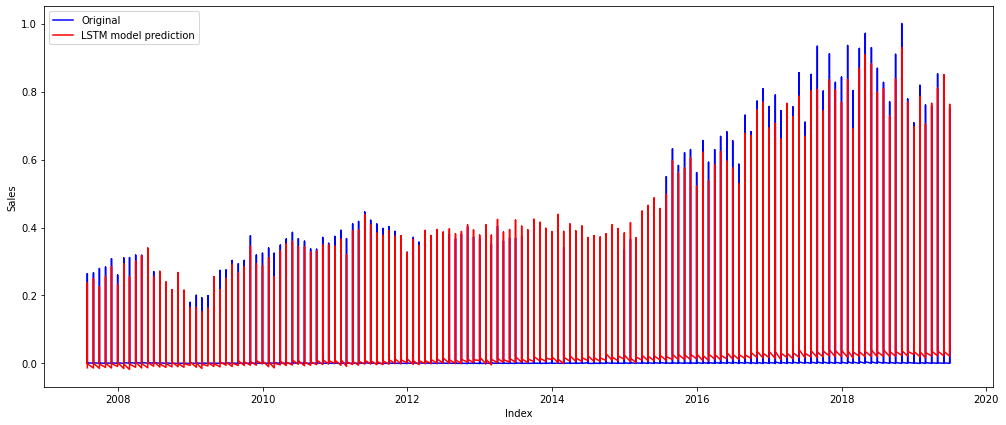

In [150]:
plt.figure(figsize=(17,7))
plt.plot(test_y.sales,color="blue",label="Original")
plt.plot(seq_test_pred,color="red",label="LSTM model prediction")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.show

## Time series Analysis

## 8. ARIMA Model

In [152]:
new_df.head(30)

Date  Type  sales  Manufacturer  Model_number  year  day  month  \
0  2007-07-31     0    120             3           108  2007   31      7   
1  2007-07-31     1   3457             0          1902  2007   31      7   
2  2007-07-31     2     39             9            46  2007   31      7   
3  2007-07-31     3  48164             5         32200  2007   31      7   
4  2007-07-31     4      7            10             0  2007   31      7   
5  2007-07-31     5  11655             8           554  2007   31      7   
6  2007-07-31     6   1129            11           654  2007   31      7   
7  2007-07-31     7    332             4           177  2007   31      7   
8  2007-08-31     0    116             3           102  2007   31      8   
9  2007-08-31     1   3931             0          1867  2007   31      8   
10 2007-08-31     2     69             9           141  2007   31      8   
11 2007-08-31     3  48549             5         33801  2007   31      8   
12 2007-08-31     4      7            10             0  2007   31      8   
13 2007-08-31     5  19320             8           533  2007   31      8   
14 2007-08-31     6   1734            11           990  2007   31      8   
15 2007-08-31     7    366             4           232  2007   31      8   
16 2007-09-30     0    101             3            60  2007   30      9   
17 2007-09-30     1   4075             0          1902  2007   30      9   
18 2007-09-30     2    101             9           113  2007   30      9   
19 2007-09-30     3  50900             5         34000  2007   30      9   
20 2007-09-30     4      1            10             0  2007   30      9   
21 2007-09-30     5  12665             8           405  2007   30      9   
22 2007-09-30     6   1832            11           906  2007   30      9   
23 2007-09-30     7    288             4           151  2007   30      9   
24 2007-10-31     0     65             3            66  2007   31     10   
25 2007-10-31     1   4178             0          2207  2007   31     10   
26 2007-10-31     2    127             9           128  2007   31     10   
27 2007-10-31     3  51664             5         35000  2007   31     10   
28 2007-10-31     4      4            10             0  2007   31     10   
29 2007-10-31     5  13527             8           662  2007   31     10   

    day_of_week  quarter  season  
0             1        3       2  
1             1        3       2  
2             1        3       2  
3             1        3       2  
4             1        3       2  
5             1        3       2  
6             1        3       2  
7             1        3       2  
8             4        3       2  
9             4        3       2  
10            4        3       2  
11            4        3       2  
12            4        3       2  
13            4        3       2  
14            4        3       2  
15            4        3       2  
16            6        3       3  
17            6        3       3  
18            6        3       3  
19            6        3       3  
20            6        3       3  
21            6        3       3  
22            6        3       3  
23            6        3       3  
24            2        4       3  
25            2        4       3  
26            2        4       3  
27            2        4       3  
28            2        4       3  
29            2        4       3

In [153]:
time_series=new_df.groupby("Date")["sales"].sum()
time_series=pd.DataFrame(data=time_series,columns=["sales"])
time_series

sales
Date              
2007-07-31   64903
2007-08-31   74092
2007-09-30   69963
2007-10-31   71340
2007-11-30   76550
...            ...
2019-02-28  163061
2019-03-31  167109
2019-04-30  180554
2019-05-31  176723
2019-06-30  158337

[144 rows x 1 columns]

Text(0.5, 1.0, 'Vehical sale')

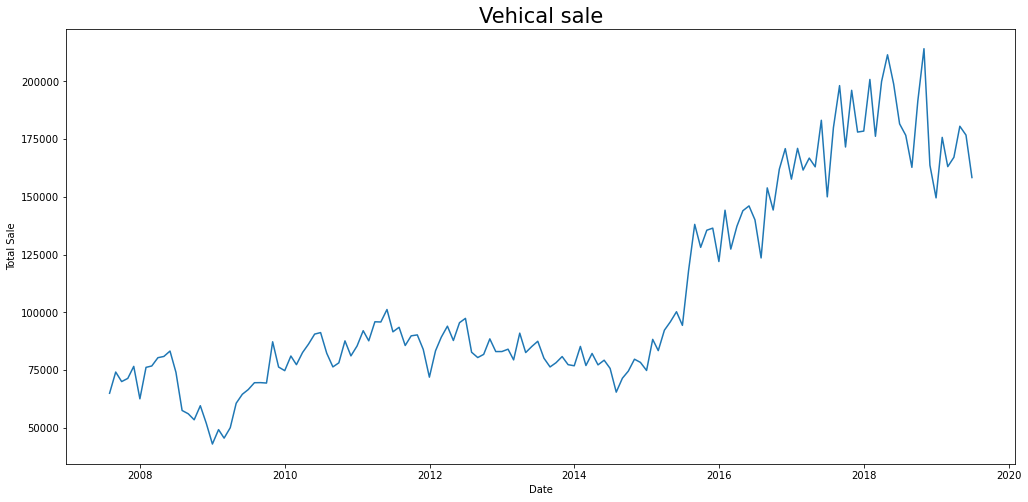

In [154]:
plt.figure(figsize=(17,8))
plt.plot(time_series)
plt.xlabel("Date")
plt.ylabel("Total Sale")
plt.title("Vehical sale",size=21)

### Checking whether our data is stationary or not.
#### 1. Rolling statestics
#### 2. ADFT 

In [155]:
#1 Rolling stats

Rolling_mean=time_series.rolling(window=12).mean()
Rolling_mean

sales
Date                     
2007-07-31            NaN
2007-08-31            NaN
2007-09-30            NaN
2007-10-31            NaN
2007-11-30            NaN
...                   ...
2019-02-28  182408.166667
2019-03-31  179673.416667
2019-04-30  177094.250000
2019-05-31  175251.583333
2019-06-30  173314.416667

[144 rows x 1 columns]

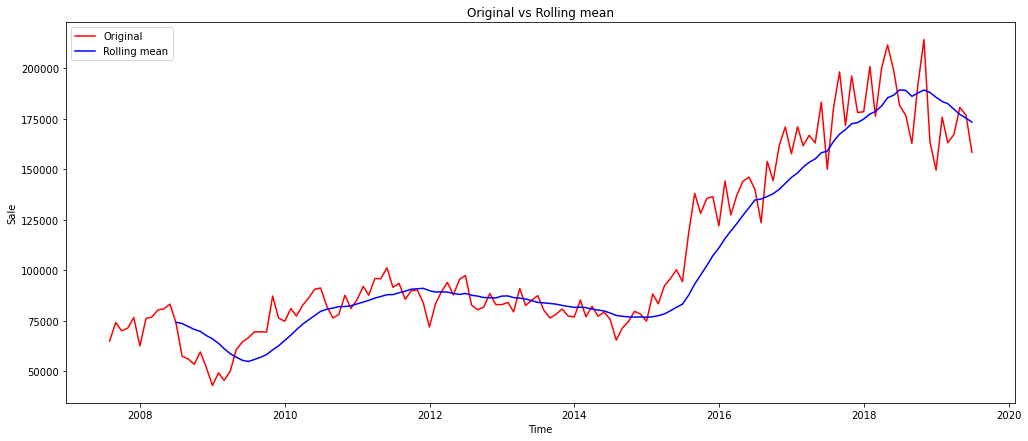

In [156]:
plt.figure(figsize=(17,7))
plt.plot(time_series,color="red",label="Original")
plt.plot(Rolling_mean,color="blue",label="Rolling mean")
plt.title("Original vs Rolling mean")
plt.xlabel("Time")
plt.ylabel("Sale")
plt.legend()
plt.show()

* Here we can see above graph. it says that our data is not stationary data

In [157]:
dftest=adfuller(time_series["sales"],autolag="AIC")
dftoutput=pd.Series(dftest[0:4],index=["Test statistics","p-value","Lags used","No. of observations used"])
for key, value in dftest[4].items():
    dftoutput["Critical value(%s)" %key]=value
    
print(dftoutput)

Test statistics              -1.283632
p-value                       0.636627
Lags used                    14.000000
No. of observations used    129.000000
Critical value(1%)           -3.482088
Critical value(5%)           -2.884219
Critical value(10%)          -2.578864
dtype: float64


* Here p value os 0.63 which should be greater than 0.05. and critical values should also greater than Test statistics.
* That means clearly we can say our series is not stationary.

In [158]:
def stationarity_test(timeseries):
    
    # Determine rolling statistics
    movingavg=timeseries.rolling(window=12).mean()
    movingstd=timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.figure(figsize=(17,8))
    plt.plot(timeseries,color="blue",label="Original")
    plt.plot(movingavg,color="red",label="Moving Average")
    plt.plot(movingstd,color="black",label="Moving standard deviation")
    plt.title("Moving average and standard deviation")
    plt.legend(loc="best")
    plt.show()
    
    #Perform Dickey-Fuller test:
    print("Result of dickey-fuller test is ")
    dftest=adfuller(timeseries["sales"],autolag="AIC")
    print("Test statistics is :    ",dftest[0])
    print("p value is :            ",dftest[1])
    print("No. of lags used  :     ",dftest[2])
    print("No.of observations used for ADF test :",dftest[3])
    print("Critical values:")
    for key,value in dftest[4].items():
        print("\t",key," : ",value)

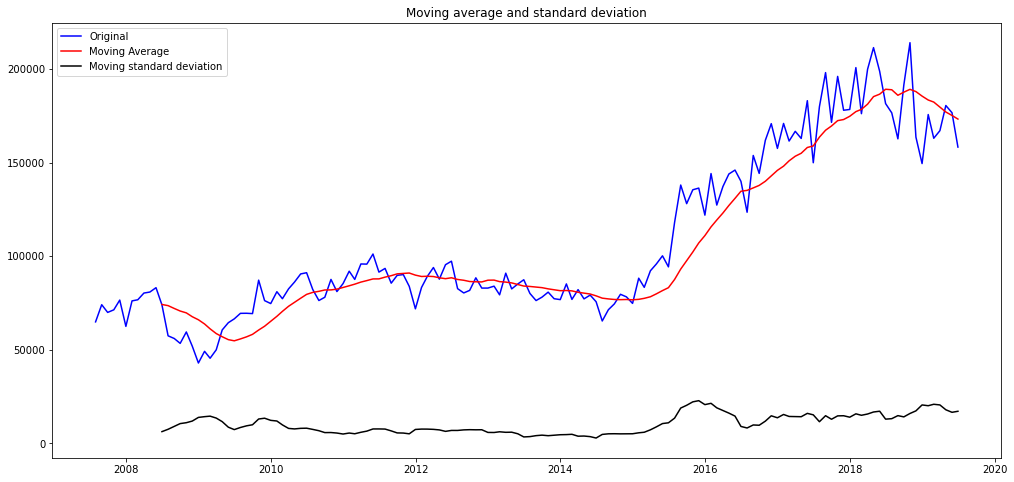

Result of dickey-fuller test is 
Test statistics is :     -1.283632267422271
p value is :             0.6366269087405114
No. of lags used  :      14
No.of observations used for ADF test : 129
Critical values:
	 1%  :  -3.482087964046026
	 5%  :  -2.8842185101614626
	 10%  :  -2.578864381347275


In [159]:
stationarity_test(time_series)

* To make data stationary, I am using different transformations.

In [160]:
# 1. Log

time_series_log=np.log(time_series)
time_series_log

sales
Date                 
2007-07-31  11.080649
2007-08-31  11.213063
2007-09-30  11.155722
2007-10-31  11.175212
2007-11-30  11.245699
...               ...
2019-02-28  12.001880
2019-03-31  12.026402
2019-04-30  12.103785
2019-05-31  12.082339
2019-06-30  11.972481

[144 rows x 1 columns]

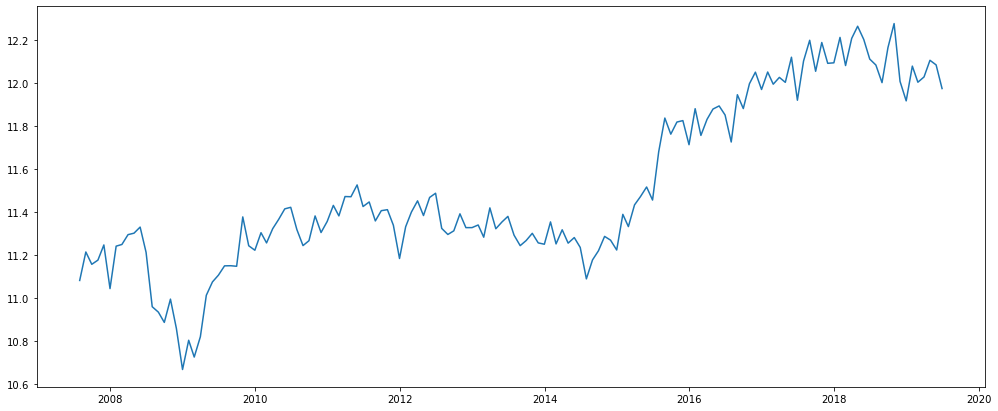

In [161]:
plt.figure(figsize=(17,7))
plt.plot(time_series_log)

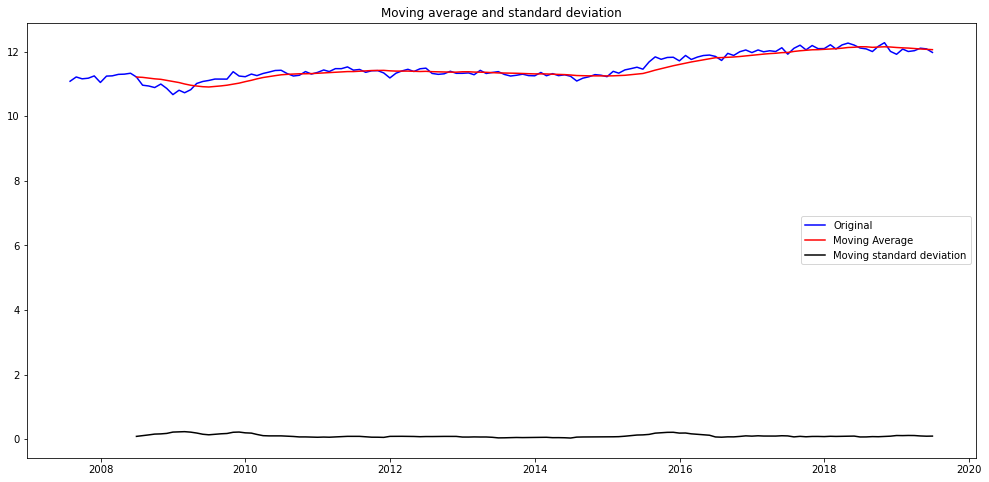

Result of dickey-fuller test is 
Test statistics is :     -0.9762331061696986
p value is :             0.7618337400118862
No. of lags used  :      12
No.of observations used for ADF test : 131
Critical values:
	 1%  :  -3.481281802271349
	 5%  :  -2.883867891664528
	 10%  :  -2.5786771965503177


In [162]:
stationarity_test(time_series_log)

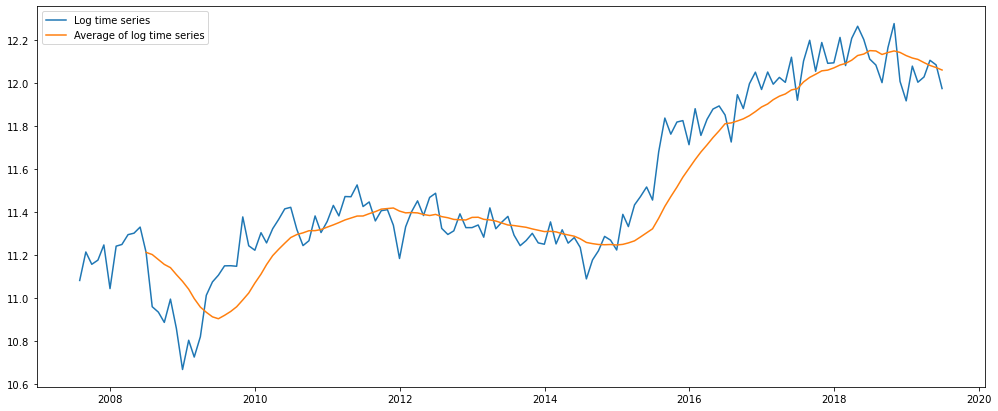

In [163]:
# 2.moving average of log series

movingavg_log=time_series_log.rolling(window=12).mean()
movingstd_log=time_series_log.rolling(window=12).std()
plt.figure(figsize=(17,7))
plt.plot(time_series_log,label=("Log time series"))
plt.plot(movingavg_log,label=("Average of log time series"))
plt.legend()
plt.show()

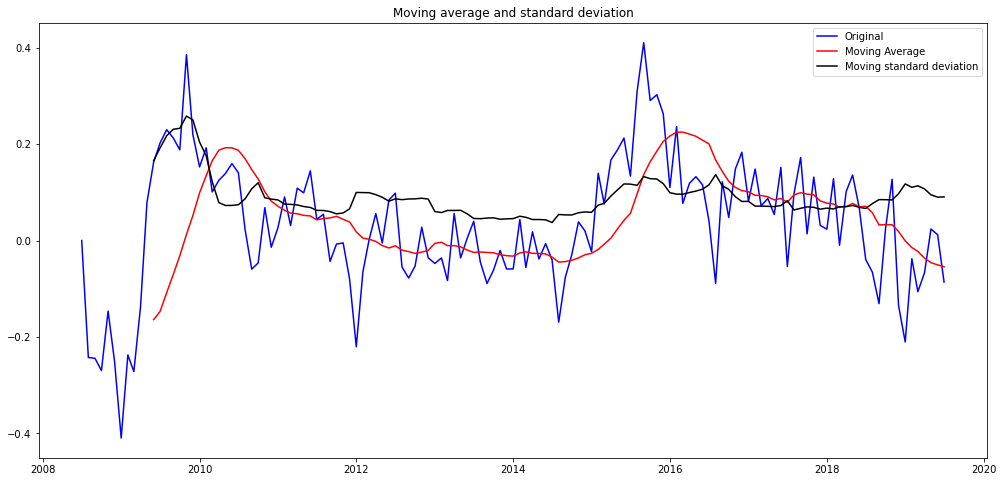

Result of dickey-fuller test is 
Test statistics is :     -2.572773335243227
p value is :             0.09875603628787244
No. of lags used  :      12
No.of observations used for ADF test : 120
Critical values:
	 1%  :  -3.486055829282407
	 5%  :  -2.8859430324074076
	 10%  :  -2.5797850694444446


In [164]:
# 3. Log of time series - time series
movingavg_log_minus_time_series_log=time_series_log-movingavg_log
movingavg_log_minus_time_series_log.dropna(inplace=True)
stationarity_test(movingavg_log_minus_time_series_log)

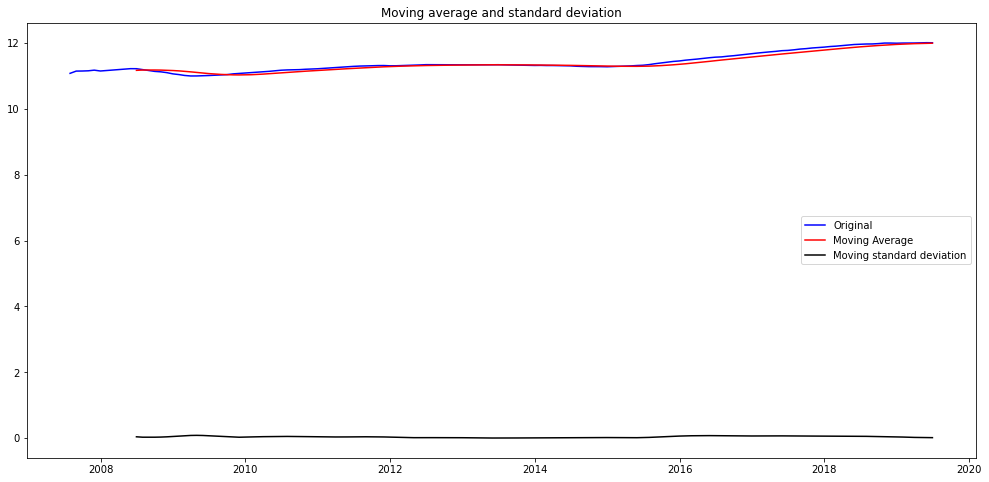

Result of dickey-fuller test is 
Test statistics is :     -0.9471671519090845
p value is :             0.7720432199393884
No. of lags used  :      13
No.of observations used for ADF test : 130
Critical values:
	 1%  :  -3.4816817173418295
	 5%  :  -2.8840418343195267
	 10%  :  -2.578770059171598


In [165]:
# 4. Exponential Weighted Moving Average
exponentialdecayweightedaverage=time_series_log.ewm(halflife=12,min_periods=0,adjust=True).mean()
stationarity_test(exponentialdecayweightedaverage)   # EWM = Exponential Weighted Moving Average

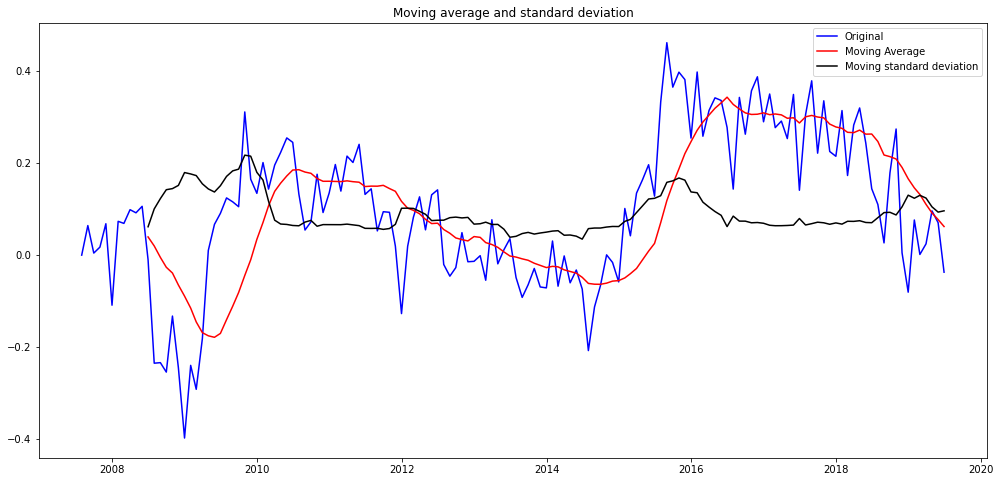

Result of dickey-fuller test is 
Test statistics is :     -2.3869874864360754
p value is :             0.14544282648915235
No. of lags used  :      12
No.of observations used for ADF test : 131
Critical values:
	 1%  :  -3.481281802271349
	 5%  :  -2.883867891664528
	 10%  :  -2.5786771965503177


In [166]:
# 5. log moving average-Exponential decay

log_series_minus_expo_decay_moving_avge=time_series_log-exponentialdecayweightedaverage
log_series_minus_expo_decay_moving_avge.dropna(inplace=True)
stationarity_test(log_series_minus_expo_decay_moving_avge)

In [167]:
# 6. Time Shift Transformation (Differentiation)

shift_log_series=time_series_log-time_series_log.shift()
shift_log_series

sales
Date                
2007-07-31       NaN
2007-08-31  0.132414
2007-09-30 -0.057341
2007-10-31  0.019491
2007-11-30  0.070487
...              ...
2019-02-28 -0.074841
2019-03-31  0.024522
2019-04-30  0.077384
2019-05-31 -0.021446
2019-06-30 -0.109858

[144 rows x 1 columns]

In [168]:
shift_log_series.dropna(inplace=True)
shift_log_series

sales
Date                
2007-08-31  0.132414
2007-09-30 -0.057341
2007-10-31  0.019491
2007-11-30  0.070487
2007-12-31 -0.202874
...              ...
2019-02-28 -0.074841
2019-03-31  0.024522
2019-04-30  0.077384
2019-05-31 -0.021446
2019-06-30 -0.109858

[143 rows x 1 columns]

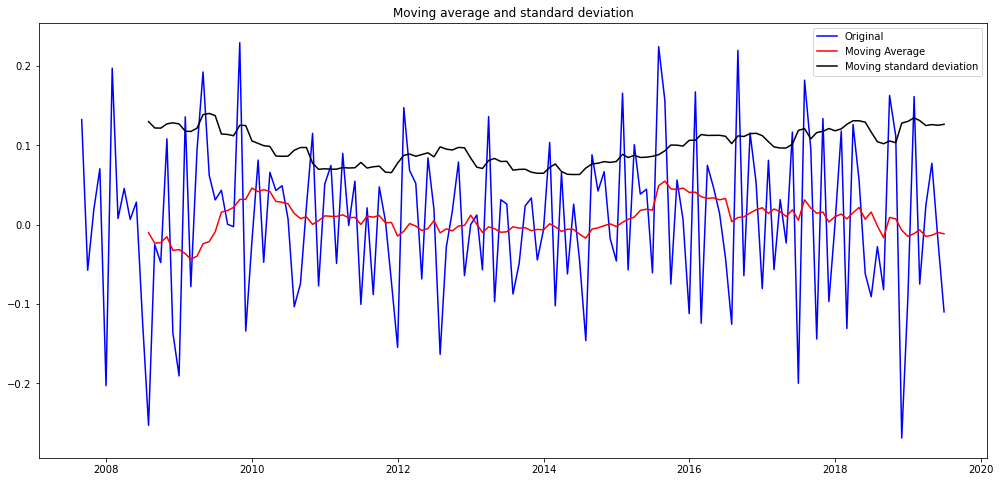

Result of dickey-fuller test is 
Test statistics is :     -3.391566507629292
p value is :             0.011249750566316377
No. of lags used  :      11
No.of observations used for ADF test : 131
Critical values:
	 1%  :  -3.481281802271349
	 5%  :  -2.883867891664528
	 10%  :  -2.5786771965503177


In [169]:
stationarity_test(shift_log_series)

 Here we differentiate once and we have got a fine p value. so we fix **d=1**.

In [170]:
shift_log_series

sales
Date                
2007-08-31  0.132414
2007-09-30 -0.057341
2007-10-31  0.019491
2007-11-30  0.070487
2007-12-31 -0.202874
...              ...
2019-02-28 -0.074841
2019-03-31  0.024522
2019-04-30  0.077384
2019-05-31 -0.021446
2019-06-30 -0.109858

[143 rows x 1 columns]

* we found d value. Now we have to find p and q.

In [171]:
lag_acf=acf(shift_log_series,nlags=20) # (Auto Corelation Graph )
lag_pacf=pacf(shift_log_series,nlags=20, method="ols")  # (Partial Auto Corelation Graph )
lag_pacf

array([ 1.        , -0.28613826, -0.16852548,  0.08458286, -0.09320925,
        0.05556401,  0.00436266,  0.14130224, -0.13371551,  0.07474433,
       -0.20748372, -0.22115117,  0.26528367, -0.07229755,  0.11821075,
       -0.09935457, -0.06159242,  0.03861771, -0.07818616,  0.01092349,
        0.01382573])

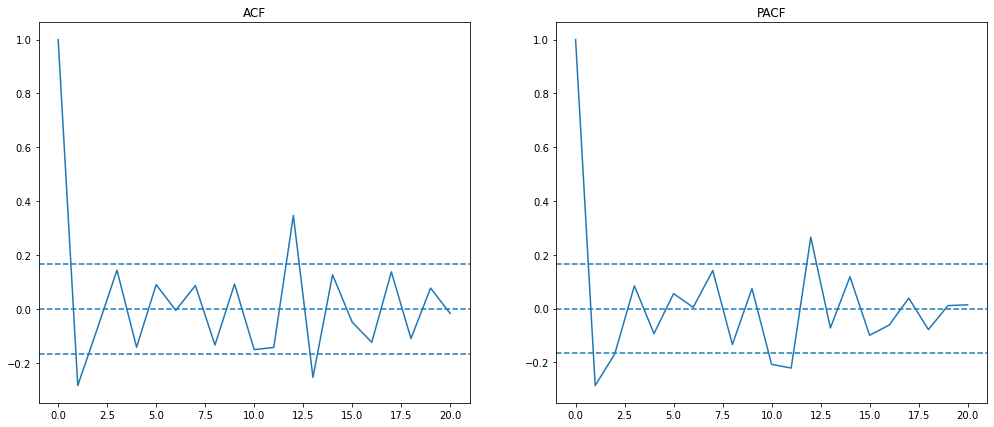

In [172]:
# Plot ACF
plt.figure(figsize=(17,7))

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle="--")
plt.axhline(y=-1.98/np.sqrt(len(shift_log_series)),linestyle="--")
plt.axhline(y=1.98/np.sqrt(len(shift_log_series)),linestyle="--")
plt.title("ACF")

#PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle="--")
plt.axhline(y=-1.98/np.sqrt(len(shift_log_series)),linestyle="--")
plt.axhline(y=1.98/np.sqrt(len(shift_log_series)),linestyle="--")
plt.title("PACF")
plt.show()

* Here in ACF graph, line cuts 0th dotted line at 1 so p=1 and same in PACF graph q=1.

In [173]:
from statsmodels.tsa.arima.model import ARIMA

In [377]:
Arima_model=ARIMA(shift_log_series,order=(1,1,0))
Arima_model

In [378]:
ARIMA_result=Arima_model.fit()
ARIMA_result

In [379]:
print(ARIMA_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  89.005
Date:                Thu, 25 Jan 2024   AIC                           -174.009
Time:                        17:40:31   BIC                           -168.098
Sample:                    08-31-2007   HQIC                          -171.607
                         - 06-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5807      0.077     -7.504      0.000      -0.732      -0.429
sigma2         0.0167      0.002      8.827      0.000       0.013       0.020
Ljung-Box (L1) (Q):                  12.58   Jarque-

Plotting ARIMA Model
RMSE : 0.12945022759454802


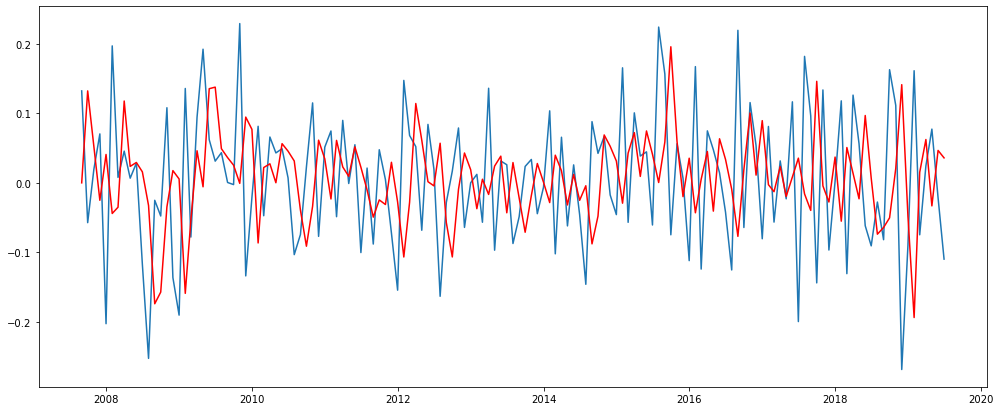

In [380]:
print("Plotting ARIMA Model")
print("RMSE :",np.sqrt(np.mean((ARIMA_result.fittedvalues-shift_log_series.sales)**2)))
plt.figure(figsize=(17,7))
plt.plot(shift_log_series)
plt.plot(ARIMA_result.fittedvalues,color="red")

In [381]:
ts_pred_ARIMA=ARIMA_result.fittedvalues
ts_pred_ARIMA.head(20)

Date
2007-08-31    0.000000
2007-09-30    0.132414
2007-10-31    0.052855
2007-11-30   -0.025128
2007-12-31    0.040872
2008-01-31   -0.044125
2008-02-29   -0.035118
2008-03-31    0.117830
2008-04-30    0.023705
2008-05-31    0.029350
2008-06-30    0.015839
2008-07-31   -0.032677
2008-08-31   -0.174144
2008-09-30   -0.157346
2008-10-31   -0.034616
2008-11-30    0.017629
2008-12-31    0.005596
2009-01-31   -0.159154
2009-02-28   -0.053668
2009-03-31    0.046194
dtype: float64

In [382]:
ts_pred_ARIMA_cumsum=ts_pred_ARIMA.cumsum()
ts_pred_ARIMA_cumsum

Date
2007-08-31    0.000000
2007-09-30    0.132414
2007-10-31    0.185269
2007-11-30    0.160141
2007-12-31    0.201013
                ...   
2019-02-28    0.979191
2019-03-31    1.041590
2019-04-30    1.008409
2019-05-31    1.055094
2019-06-30    1.091041
Length: 143, dtype: float64

In [383]:
log_series=pd.Series(time_series_log.sales.iloc[0],index=time_series_log.index)
log_series.head()

Date
2007-07-31    11.080649
2007-08-31    11.080649
2007-09-30    11.080649
2007-10-31    11.080649
2007-11-30    11.080649
dtype: float64

In [384]:
prediction_AR_log=log_series.add(ts_pred_ARIMA_cumsum,fill_value=0)
prediction_AR_log.head()

Date
2007-07-31    11.080649
2007-08-31    11.080649
2007-09-30    11.213063
2007-10-31    11.265918
2007-11-30    11.240790
dtype: float64

In [385]:
prediction_AR=np.exp(prediction_AR_log)
prediction_AR.head()

Date
2007-07-31    64903.000000
2007-08-31    64903.000000
2007-09-30    74091.999857
2007-10-31    78113.512617
2007-11-30    76175.138435
dtype: float64

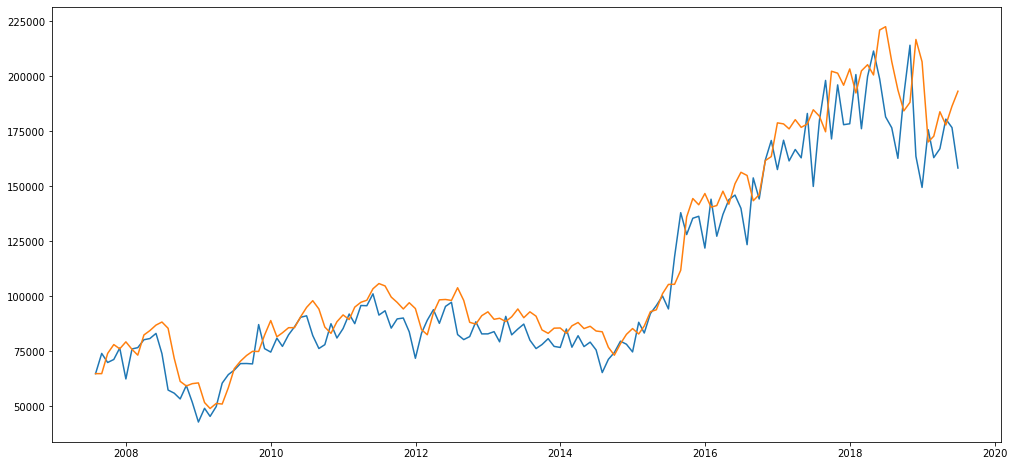

In [386]:
plt.plot(time_series)
plt.plot(prediction_AR)

In [387]:
prediction_AR=pd.DataFrame(prediction_AR,columns=["sales"])
prediction_AR.head()

sales
Date                    
2007-07-31  64903.000000
2007-08-31  64903.000000
2007-09-30  74091.999857
2007-10-31  78113.512617
2007-11-30  76175.138435

In [388]:
error=ARIMA_result.resid
error

Date
2007-08-31    0.132414
2007-09-30   -0.189755
2007-10-31   -0.033365
2007-11-30    0.095615
2007-12-31   -0.243745
                ...   
2019-02-28   -0.090084
2019-03-31   -0.037877
2019-04-30    0.110565
2019-05-31   -0.068132
2019-06-30   -0.145805
Length: 143, dtype: float64

In [389]:
ARIMA_rmse=RMSE(time_series, prediction_AR)
ARIMA_rmse

sales    14354.874571
dtype: float64

In [390]:
ARIMA_mape=MAPE(time_series, prediction_AR)
ARIMA_mape

sales    8.665974
dtype: float64

In [391]:
r2_score_ARIMA=r2_score(time_series, prediction_AR)
r2_score_ARIMA

0.8918251224388797

## Prediction and reverse transformation

In [394]:
# Forecast the next 10 days
forecast_steps = 10
forecast_values = ARIMA_result.get_forecast(steps=forecast_steps).predicted_mean

In [395]:
forecast_values

2019-07-31   -0.058515
2019-08-31   -0.088331
2019-09-30   -0.071016
2019-10-31   -0.081071
2019-11-30   -0.075232
2019-12-31   -0.078623
2020-01-31   -0.076654
2020-02-29   -0.077797
2020-03-31   -0.077133
2020-04-30   -0.077519
Freq: M, Name: predicted_mean, dtype: float64

In [396]:
time_series.iloc[-1].values

array([158337], dtype=int64)

In [397]:
# Convert forecast values back to the original scale
forecast_original_scale = np.exp(forecast_values.cumsum()) * time_series.iloc[-1].values
forecast_original_scale

2019-07-31    149337.842201
2019-08-31    136712.464656
2019-09-30    127340.447267
2019-10-31    117424.175498
2019-11-30    108914.270093
2019-12-31    100679.082328
2020-01-31     93250.037298
2020-02-29     86270.453078
2020-03-31     79866.305210
2020-04-30     73909.045938
Freq: M, Name: predicted_mean, dtype: float64

In [398]:
# Display the forecasted values
print("Forecasted Values in Original Scale:")
forecast_original_scale=pd.DataFrame(forecast_original_scale)
forecast_original_scale

Forecasted Values in Original Scale:


predicted_mean
2019-07-31   149337.842201
2019-08-31   136712.464656
2019-09-30   127340.447267
2019-10-31   117424.175498
2019-11-30   108914.270093
2019-12-31   100679.082328
2020-01-31    93250.037298
2020-02-29    86270.453078
2020-03-31    79866.305210
2020-04-30    73909.045938

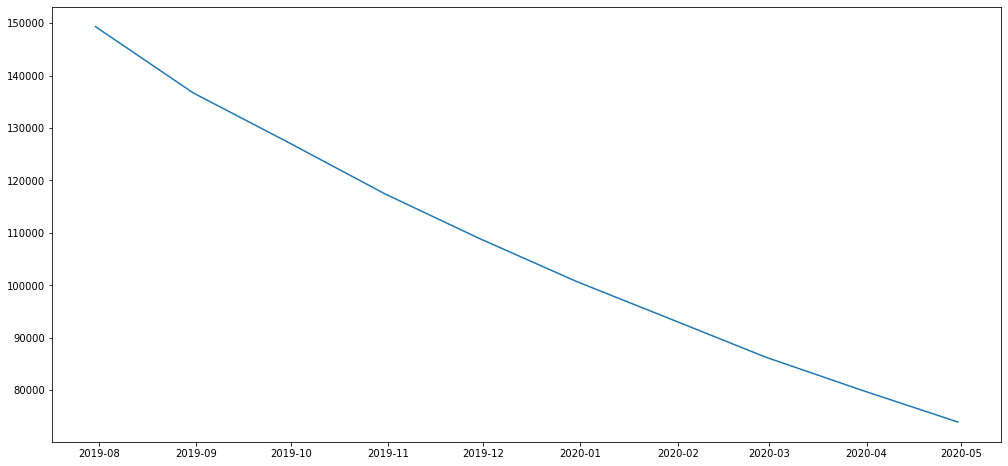

In [399]:
plt.plot(forecast_original_scale, label='Forecast')

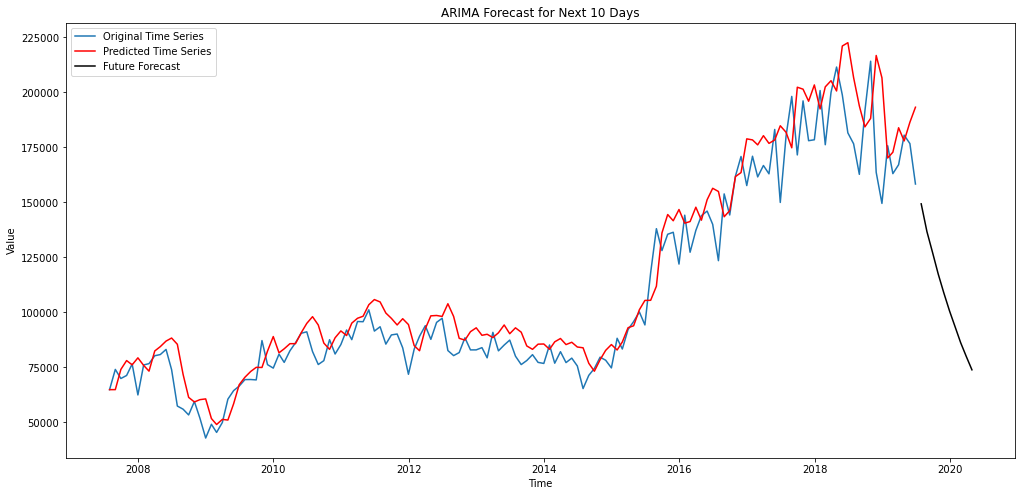

In [404]:
plt.plot(time_series, label='Original Time Series')
plt.plot(prediction_AR,label='Predicted Time Series',color="red")
plt.plot(forecast_original_scale, label='Future Forecast',color="black")
plt.title('ARIMA Forecast for Next 10 Days')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [403]:
model_df=pd.DataFrame({"Models":["XGBoost","SVM","KNN","Random Forest","AdaBoost Model","Bagging Model","Votting Model",
                                 "LSTM Model","ARIMA Model"],
                       "Train_accuracy":[r2_score_train_reg,r2_score_train_svm,r2_score_train_knn,r2_score_train_rf,
                                        r2_score_train_Ada,r2_score_train_Bagg,r2_score_train_Vot,r2_score_train_seq,
                                         r2_score_ARIMA],
                      "Test_accuracy":[r2_score_test_reg,r2_score_test_svm,r2_score_test_knn,r2_score_test_rf,
                                      r2_score_test_Ada,r2_score_test_bagg,r2_score_test_voting,r2_score_test_seq,"-"],
                      "RMSE(train)":[reg_rmse_train.values[0],svm_rmse_train.values[0],knn_rmse_train.values[0],
                                     rf_rmse_train.values[0],Ada_rmse_train.values[0], Bgg_rmse_train.values[0],
                                     Vot_rmse_train.values[0],seq_rmse_train.values[0],"-"],
                      "MAPE(train)":[reg_mape_train.values[0],svm_mape_train.values[0],knn_mape_train.values[0],
                                     rf_mape_train.values[0],Ada_mape_train.values[0],Bagg_mape_train.values[0],
                                     Vot_mape_train.values[0],seq_mape_train.values[0],ARIMA_mape.values[0]],
                      "RMSE(test)":[reg_rmse.values[0],svm_rmse.values[0],knn_rmse.values[0],RF_rmse.values[0],
                                    Ada_rmse.values[0],Bagg_rmse.values[0],Voting_rmse_test.values[0],seq_rmse_test.values[0],
                                   "-"],
                      "MAPE(test)":[reg_mape.values[0],svm_mape.values[0],knn_mape.values[0],RF_mape.values[0],
                                    Ada_mape.values[0],Bagg_mape.values[0],Voting_mape_test.values[0],seq_mape_test.values[0],
                                   "-"]})
model_df

Models  Train_accuracy Test_accuracy RMSE(train)  MAPE(train)  \
0         XGBoost        0.999712      0.999712    0.002994    33.251788   
1             SVM        0.876436      0.876436    0.062042    81.337802   
2             KNN        0.954087      0.954087    0.037819    74.599175   
3   Random Forest        0.999149      0.999149    0.005148     9.823394   
4  AdaBoost Model        0.980062      0.980062    0.024922    76.568796   
5   Bagging Model        0.998817      0.998817    0.006071     8.567201   
6   Votting Model        0.982200        0.9822    0.023548    28.493375   
7      LSTM Model        0.984061        0.9822    0.022283    59.886253   
8     ARIMA Model        0.891825             -           -     8.665974   

  RMSE(test) MAPE(test)  
0   0.002994  33.251788  
1   0.062042  81.337802  
2   0.037819  74.599175  
3   0.005148   9.823394  
4   0.024922  76.568796  
5   0.006071   8.567201  
6   0.023548  28.493375  
7   0.023548  28.493375  
8          -          -

#### Here from above model tables, we can go towards Bagging Model model. Because all features of this model are good as compare to other models.

# Summary and recommendation

* My selected project topic "Demand Prediction" provided valuable insights into Data visualization like line plots, bar plots, heatmaps,etc., feature selection and time series analysis. Machine Learning models, LSTM and  ARIMA model, while effective in capturing certain patterns, highlighted areas for improvement and potential avenues for future exploration.
* I have used many algorithms here so that we can clearly find out the suitable algorithm for future predictions.

#                                          Thank You..!!